<h1 align="center"> Playground Series - Season 4 Episode 9: Regression of Used Car Prices <h1>

<!DOCTYPE html>
<html>
<head>
</head>
<body>
    <h1 align="center">Vehicle Features</h1>
<table>
  <tr>
    <th>Feature Name</th>
    <th>Explanation</th>
  </tr>
  <tr>
    <td>Brand & Model</td>
    <td>Identify the brand or company name along with the specific model of each vehicle.</td>
  </tr>
  <tr>
    <td>Model Year</td>
    <td>Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements</td>
  </tr>
  <tr>
    <td>Mileage</td>
    <td>Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.</td>
  </tr>
  <tr>
    <td>Fuel Type</td>
    <td>Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.</td>
  </tr>
  <tr>
    <td>Engine Type</td>
    <td>Understand the engine specifications, shedding light on performance and efficiency.</td>
  </tr>
  <tr>
    <td>Transmission</td>
    <td>Determine the transmission type, whether automatic, manual, or another variant.</td>
  </tr>
  <tr>
    <td>Exterior Color</td>
    <td>Explore the aesthetic aspects of the vehicles, including exterior and interior color options.</td>
  </tr>
  <tr>
    <td>Interior Color</td>
    <td>The color of the vehicle's interior.</td>
  </tr>
  <tr>
    <td>Accident History</td>
    <td>Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.</td>
  </tr>
  <tr>
    <td>Clean Title</td>
    <td>Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.</td>
  </tr>
  <tr>
    <td>Price</td>
    <td>Access the listed prices for each vehicle, aiding in price comparison and budgeting.</td>
  </tr>
</table>
    
The goal of this notebook is to predict the price of used cars based on various attributes
</body>
</html>

<section id="back"> </section>

<nav style="margin-top: 20px; padding: 10px; background-color: #f0f0f0; border: 10px solid #ccc;">
    <div style="background-color:#2C41FF">
  <h2 style="margin: 0;text-align: center;">Table of Contents</h2>
    </div>
  <ul style="list-style: none; padding: 0;">
    <li style="margin: 5px 0;"><a href="#sec1" style="text-decoration: none; color: #333;">Imports</a></li>
    <li style="margin: 5px 0;"><a href="#sec2" style="text-decoration: none; color: #333;">EDA</a></li>
    <li style="margin: 5px 0;"><a href="#sec3" style="text-decoration: none; color: #333;">Preprocessing</a></li>
    <li style="margin: 5px 0;"><a href="#sec4" style="text-decoration: none; color: #333;">Modeling</a></li>
    <li style="margin: 5px 0;"><a href="#sec5" style="text-decoration: none; color: #333;">Predictions</a></li>
  </ul>
</nav>

<section id="sec1"> </section>
<h1> Imports </h1>

<a href="#back" style="text-decoration: none; color: #333;">Back to table of contents</a>

In [109]:
!pip install skimpy --quiet
!pip install wordcloud --quiet
!pip install category_encoders --quiet
!pip install shap

# Basic imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import skimpy
import re
import time
import random
import datetime
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="Parameters: { 'verbose' } are not used.")

##################### Preprocessing imports 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.inspection import permutation_importance
from sklearn.base import clone

##################### Models
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

##################### optuna library import
import optuna
import shap
random_state = 42

<h3 align="center">Data Download</h3>

In [2]:
######## Download the data 
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
original=pd.read_csv("used-car-price-prediction-dataset/used_cars.csv")
sample_sub=pd.read_csv("sample_submission.csv")

<h3 align="center">First look</h3>

In [3]:
# Table for first look
def summary(train):
    sum = pd.DataFrame(train.dtypes, columns=['dtypes'])
    sum['missing#'] = train.isna().sum()
    sum['missing%'] = (train.isna().sum())/len(train)
    sum['uniques'] = train.nunique().values
    sum['count'] = train.count().values
    return sum

display(summary(train).style.background_gradient(cmap='Blues'))
display(summary(test).style.background_gradient(cmap='Blues'))
train.head(1)

,dtypes,missing#,missing%,uniques,count
id,int64,0,0.000000,188533,188533
brand,object,0,0.000000,57,188533
model,object,0,0.000000,1897,188533
model_year,int64,0,0.000000,34,188533
milage,int64,0,0.000000,6651,188533
fuel_type,object,5083,0.026961,7,183450
engine,object,0,0.000000,1117,188533
transmission,object,0,0.000000,52,188533
ext_col,object,0,0.000000,319,188533
int_col,object,0,0.000000,156,188533


,dtypes,missing#,missing%,uniques,count
id,int64,0,0.000000,125690,125690
brand,object,0,0.000000,55,125690
model,object,0,0.000000,1891,125690
model_year,int64,0,0.000000,36,125690
milage,int64,0,0.000000,5700,125690
fuel_type,object,3383,0.026915,7,122307
engine,object,0,0.000000,1117,125690
transmission,object,0,0.000000,52,125690
ext_col,object,0,0.000000,317,125690
int_col,object,0,0.000000,156,125690


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200


In [4]:
skimpy.skim(train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 188533 │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 13     │ │ int32       │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ id             │   0 │      0 │   94270 │   54420 │     0 │  47130 │  94270 │  141400 │    188500 │ ▇▇▇▇▇▇ │  │
│ │ model_year     │   0 │      0 │    2016 │   5.661 │  1974 │   2013 │   2017 │    2020 │      2024 │    ▁▃▇ │  │
│ │ milage         │   0 │      0 │   65710 │   49800 │   100 │  24120 │  57780 │   95400 │    405000 │  ▇▅▁   │  │
│ │ price          │   0 │      0 │   43880 │   78820 │  2000 │  17000 │  30820 │   49900 │   2954000 │   ▇    │  │
│ └────────────────┴─────┴────────┴─────────┴─────────┴───────┴────────┴────────┴─────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA          ┃ NA %        ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ brand                    │           0 │           0 │                          1 │                 188533 │  │
│ │ model                    │           0 │           0 │                          3 │                 556817 │  │
│ │ fuel_type                │        5083 │         2.7 │                          1 │                 194798 │  │
│ │ engine                   │           0 │           0 │                        6.7 │                1269467 │  │
│ │ transmission             │           0 │           0 │                        1.9 │                 357594 │  │
│ │ ext_col                  │           0 │           0 │                        1.2 │                 222215 │  │
│ │ int_col                  │           0 │           0 │                        1.1 │                 198742 │  │
│ │ accident                 │        2452 │         1.3 │                        3.1 │                 579997 │  │
│ │ clean_title              │       21419 │       11.36 │                       0.89 │                 167114 │  │
│ └──────────────────────────┴─────────────┴─────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<h3> General insights </h3>
<ol>
  <li>Most of the features are categorical - might require conversion later to numerical values</li>
  <li>Missing values in columns fuel_type, accident, clean_title</li>
  <li>The Standard Deviation in both milage and especially price is large relative to the mean. which might suggests outliers are pretty common.</li>
</ol>

<section id="sec2"></section>
<h1> EDA </h1>
<ul>
    <li style="margin: 5px 0;"><a href="#sec2.1" style="text-decoration: none; color: #333;">Target Column</a></li>
    <li style="margin: 5px 0;"><a href="#sec2.2" style="text-decoration: none; color: #333;">Pie plots</a></li>
    <li style="margin: 5px 0;"><a href="#sec2.3" style="text-decoration: none; color: #333;">Boxplots</a></li>
    <li style="margin: 5px 0;"><a href="#sec2.4" style="text-decoration: none; color: #333;">bar plots</a></li>
    <li style="margin: 5px 0;"><a href="#sec2.5" style="text-decoration: none; color: #333;">Word clouds</a></li>
    <li style="margin: 5px 0;"><a href="#sec2.6" style="text-decoration: none; color: #333;">Correlation</a></li>
    <li style="margin: 5px 0;"><a href="#sec2.7" style="text-decoration: none; color: #333;">Target relationships with other columns</a></li>
  </ul>
  
<a href="#back" style="text-decoration: none; color: #333;">Back to table of contents</a>

In [6]:
try:
    target = 'price'
    Target_series = train['price']
    train.drop('id', axis =1, inplace = True)
    test.drop('id', axis =1, inplace = True)
    train_copy = train.copy()
except:
    print("Already dropped id column")

<section id="sec2.1"> </section>
<h2> Target Column </h2>
    
<a href="#sec2" style="text-decoration: none; color: #333;">Back to visualization list</a>

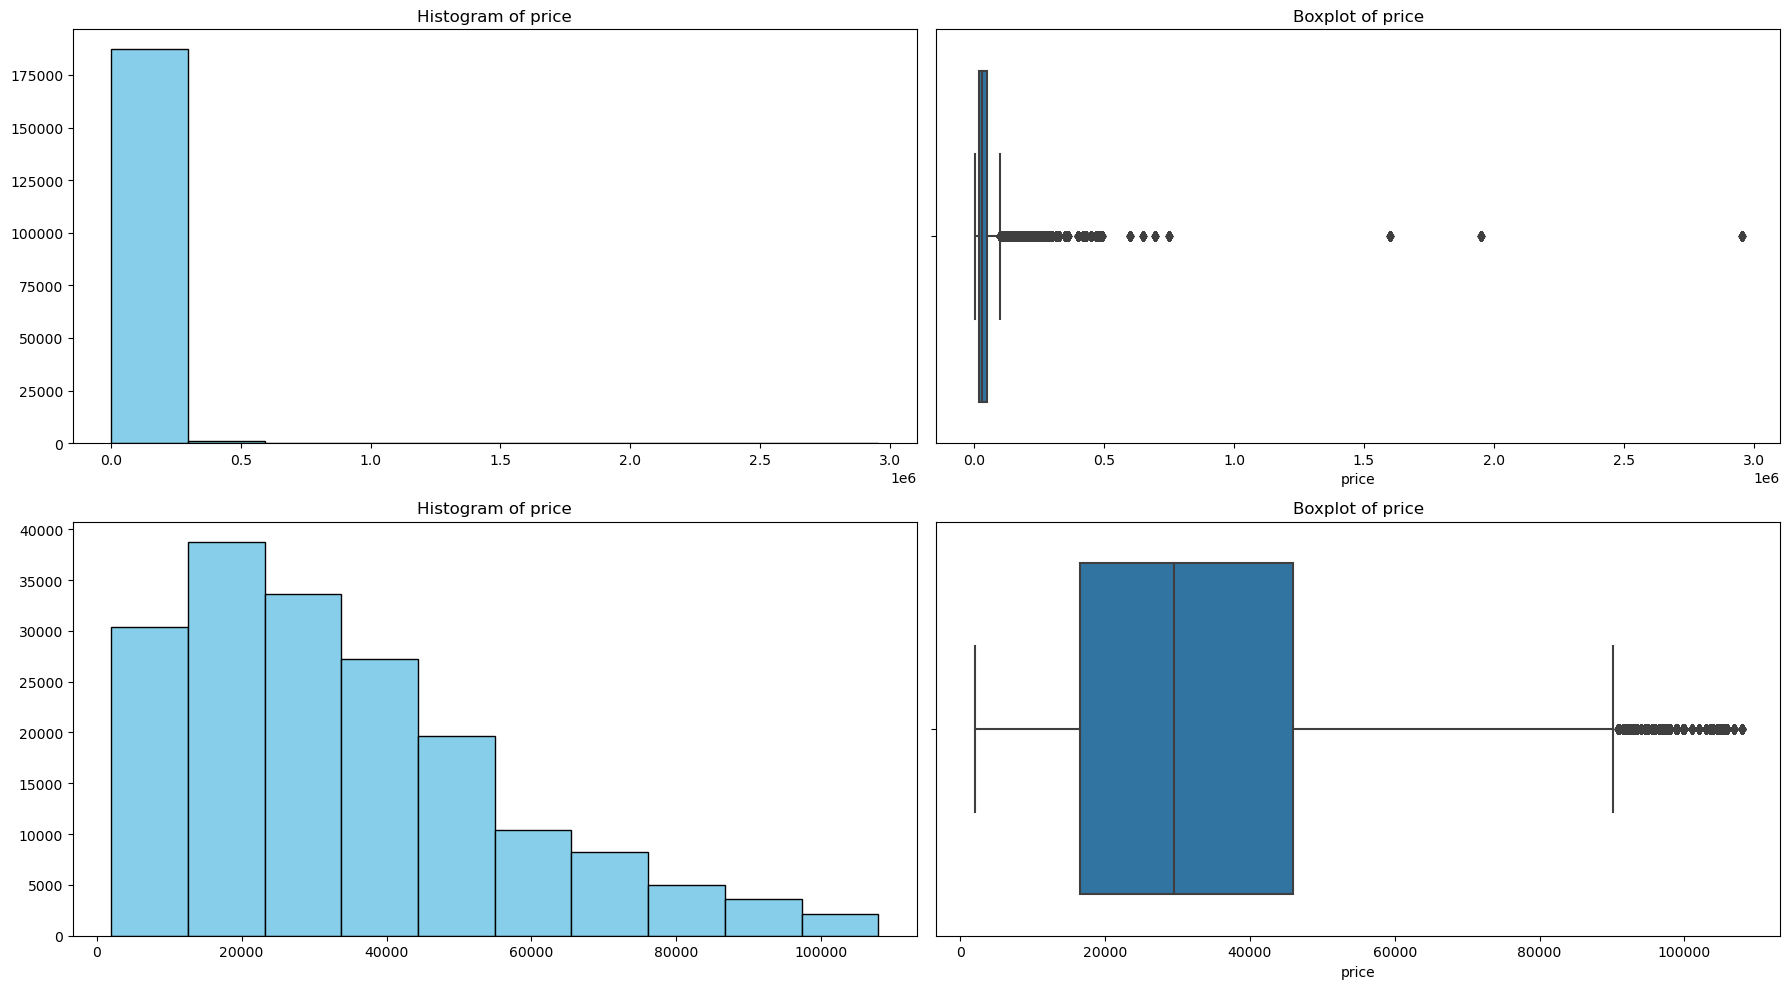

In [7]:
def TargetCol(train, target):  
    # Data set with without upper outliers
    q3 = train[target].quantile(0.95)  # 95th percentile
    bottom_95 = train[(train[target] <= q3)]
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
    
    axes[0, 0].hist(train[target],color='skyblue', edgecolor='black')
    axes[0, 0].set_title(f"Histogram of {target}")
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        sns.boxplot(x=train[target],ax= axes[0, 1])
        axes[0, 1].set_title(f"Boxplot of {target}", )
    axes[1, 0].hist(bottom_95[target],color='skyblue', edgecolor='black')
    axes[1, 0].set_title(f"Histogram of {target}")
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        sns.boxplot(x=bottom_95[target],ax= axes[1, 1])
        axes[1, 1].set_title(f"Boxplot of {target}", )
    
       
    plt.tight_layout()
    plt.show()

TargetCol(train_copy,target)

<h3> Insights about Outcome column </h3> 
With outliers
It can be seen that there are outliers at the price column which make reading those graph difficult. 
Also the outliers can affect on the model overall performence. So techniques to deal with them should be taken into account.

Without outliers
when removing outliers it can be seen that the data is skewed to the right




<h2 align="center"> Numeric Features EDA </h2>

<section id="sec2.2"> </section>
<h2>Pie Plot</h2>

<a href="#sec2" style="text-decoration: none; color: #333;">Back to visualization list</a>

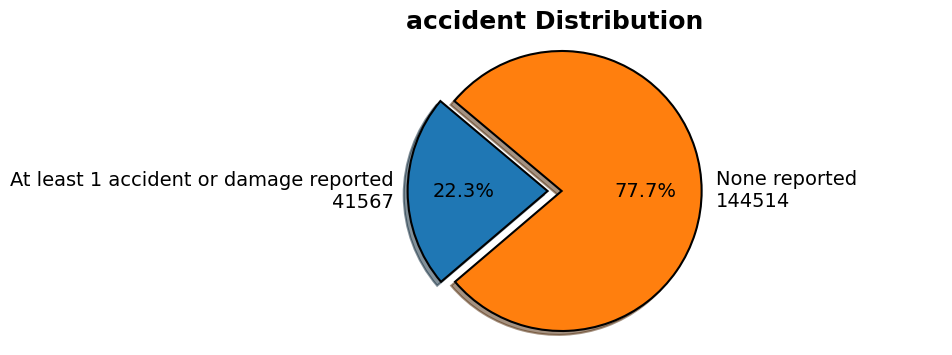

In [24]:
plt.figure(figsize=(10, 4))
explode = [0.05 for _ in range(train_copy['accident'].nunique())]
counts = train_copy.groupby('accident')['accident'].count()
labels = [f"{label}\n{count}" for label, count in zip(counts.index, counts)]

# Plotting
train_copy.groupby('accident')['accident'].count().plot.pie(
    explode=explode,
    autopct="%1.1f%%",
    shadow=True,  # Adding shadow for better visibility
    startangle=140,  # Start angle for better alignment
    textprops={'fontsize': 14},  # Adjust text size
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Adding edge color and width
    labels=labels
)

# Adding a title
plt.title('accident Distribution', fontsize=18, weight='bold')
plt.ylabel('')
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Displaying the plot
plt.show()

<section id="sec2.3"> </section>
<h2> Boxplots </h2>

<a href="#sec2" style="text-decoration: none; color: #333;">Back to visualization list</a>

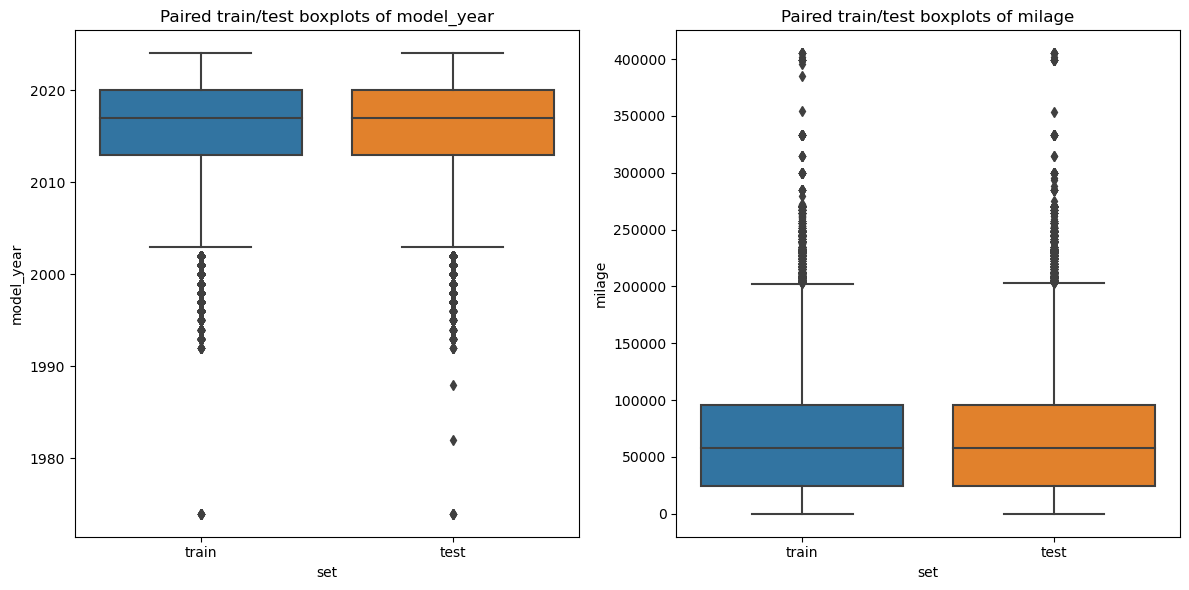

In [25]:
def plot_distribution_pairs(train, test, hue="set", figsize=(12, 6)):
    """
    Plots distribution of numerical features in train and test sets side-by-side.

    Args:
    train: Pandas DataFrame containing training data.
    test: Pandas DataFrame containing testing data.
    hue: Column name for color-coding data points (optional, defaults to "set").
    figsize: Tuple specifying the figure size (width, height) in inches (optional).
    """

    # Combine train and test data
    train_func = train.copy()
    test_func = test.copy()
    train_func['set'] = 'train'
    test_func['set'] = 'test'
    combined_data = pd.concat([train_func, test_func])

    # Get numerical columns
    numerical_columns = combined_data.select_dtypes(include=np.number).columns

    # Iterate through columns in pairs
    for i in range(0, len(numerical_columns), 2):
        # Limit to two columns per row
        if i + 1 >= len(numerical_columns):
            break

        column1, column2 = numerical_columns[i], numerical_columns[i + 1]

        # Create a figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

        # Plot boxplots on each subplot
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            sns.boxplot(x=hue, y=column1, data=combined_data, ax=ax1)
            sns.boxplot(x=hue, y=column2, data=combined_data, ax=ax2)

            # Set titles for each subplot
            ax1.set_title(f"Paired train/test boxplots of {column1}")
            ax2.set_title(f"Paired train/test boxplots of {column2}")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()
    
plot_distribution_pairs(train_copy.drop(target,axis=1), test, hue="set")

<h3> Insights </h3>
Both train and test distributions are similiar, in both numerical features
In model_year the lower whisker is longer than the upper whisker which
In milage the upper whisker is longer than the lower whisker



<section id="sec2.4"> </section>
<h2> Bar Plots </h2>

<a href="#sec2" style="text-decoration: none; color: #333;">Back to visualization list</a>

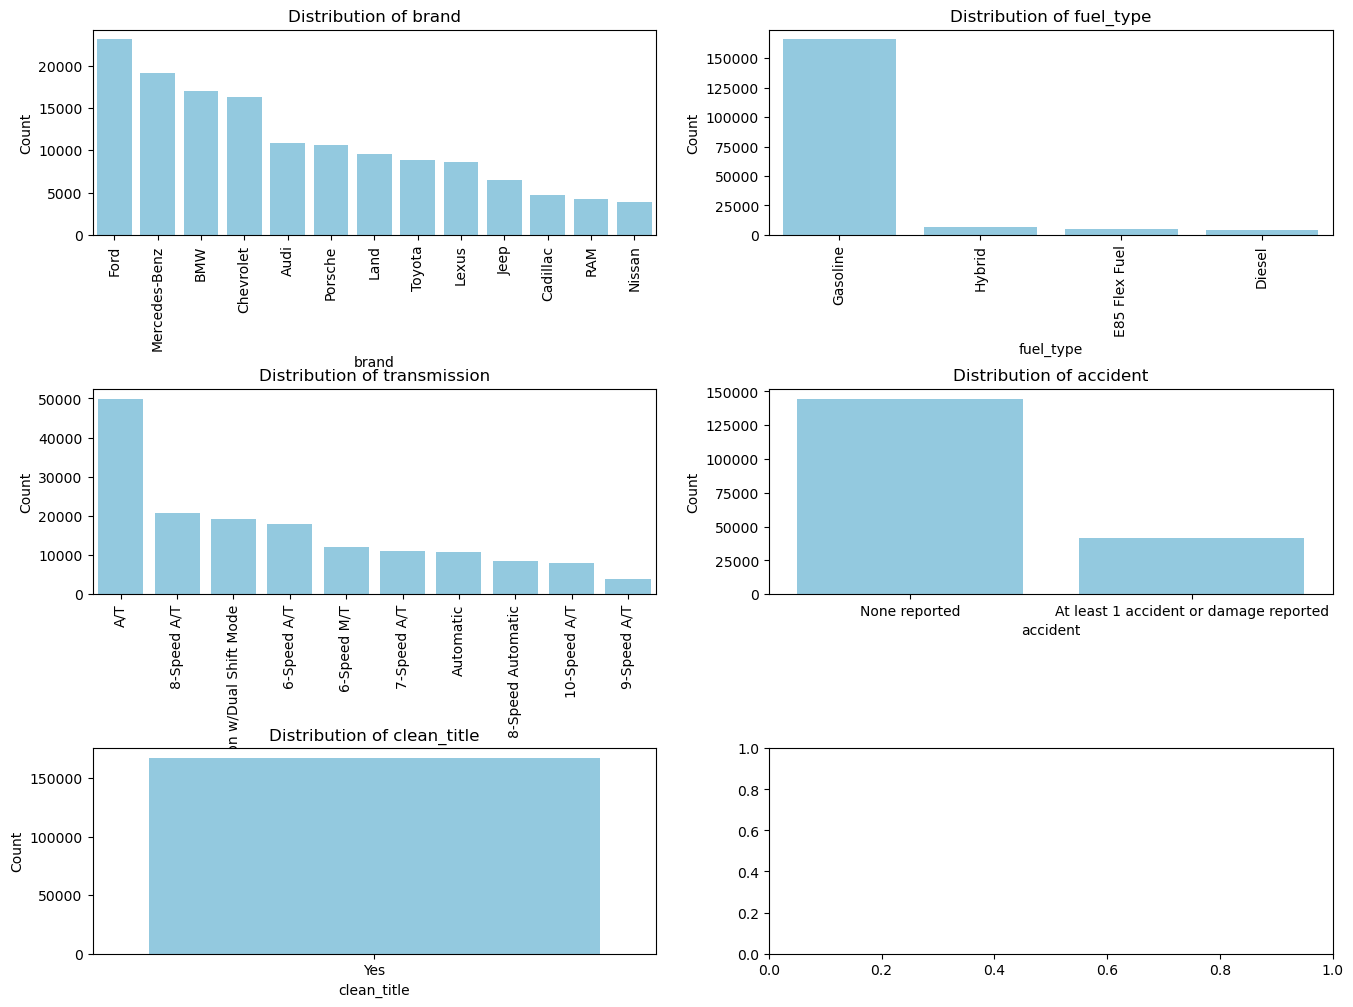

In [26]:
def barplots(train, cat_columns, min_proportion = 0.02):
    """
    Visualizes categorical data columns in a DataFrame.
    recieves only c
    Args:
        data: The DataFrame containing the categorical data.
        categorical_columns: A list of column names to visualize.
    """
    # Threshold for including category
    
    cat_train = train[cat_columns]
    num_cols = len(cat_columns)  # Number of categorical columns
    rows = (num_cols + 1) // 2  # Number of rows for subplots (ceil division)

    # Create a figure with multiple subplots
    fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 4))  # Adjust figsize as needed
    plt.subplots_adjust(hspace=0.75)
    
    # Iterate through categorical columns
    col_index = 0
    for i in range(rows):
        for j in range(2):
            if col_index >= num_cols:
                break
                    
            ax = axes[i, j]
            # Bar chart for fewer categories
            total_rows = len(cat_train)
            value_counts = cat_train[cat_columns[col_index]].value_counts()
        
            # Filter the values that appear in at least `min_proportion` of the dataset
            min_values = total_rows * min_proportion
            filtered_counts = value_counts[value_counts >= min_values]
        
            # Plot the filtered counts as a barplot
            filtered_value_counts = cat_train[cat_train[cat_columns[col_index]].isin(filtered_counts.index)]
            filtered_value_counts = filtered_value_counts[cat_columns[col_index]].value_counts()
            
            sns.barplot(x=filtered_counts.index, y=filtered_value_counts, ax=ax, color='skyblue')
            ax.set_title(f"Distribution of {cat_columns[col_index]}")
            ax.set_xlabel(cat_columns[col_index])
            ax.set_ylabel("Count")
    
            # Rotate x-axis labels if necessary
            if len(value_counts.index) > 5:
                ax.tick_params(axis='x', rotation=90)

            col_index += 1
        
    plt.show()
        
cat_columns = train_copy.select_dtypes(exclude="number").columns.tolist()
filtered_cat_columns = [col for col in cat_columns if train_copy[col].nunique() < 60]

barplots(train_copy, filtered_cat_columns)

In [27]:
def create_top_value_table(df, features, top_n=10):
    """
    Creates a table of top values for specified features in a DataFrame.

    Args:
        df: The DataFrame to analyze.
        features: A list of feature names.
        top_n: The number of top values to include for each feature.

    Returns:
        A DataFrame containing the top values for each feature.
    """

    top_values = []
    for feature in features:
        feature_values = df[feature].value_counts().head(top_n).index.tolist()
        feature_values = [str(value) for value in feature_values]  # Convert to strings
        top_values.append(pd.Series(feature_values, name=feature))  # Create Series

    return pd.concat(top_values, axis=1)

create_top_value_table(train_copy,train_copy.select_dtypes(exclude='number').columns.tolist())

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Ford,F-150 XLT,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
1,Mercedes-Benz,M3 Base,Hybrid,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Beige,At least 1 accident or damage reported,NaN
2,BMW,Camaro 2SS,E85 Flex Fuel,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Gray,NaN,NaN
3,Chevrolet,M4 Base,Diesel,2.0L I4 16V GDI DOHC Turbo,6-Speed A/T,Silver,Brown,NaN,NaN
4,Audi,Mustang GT Premium,–,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Blue,Red,NaN,NaN
5,Porsche,F-150 Lariat,Plug-In Hybrid,340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Red,White,NaN,NaN
6,Land,E-Class E 350 4MATIC,not supported,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Automatic,Green,–,NaN,NaN
7,Toyota,1500 Laramie,NaN,455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,8-Speed Automatic,Gold,Jet Black,NaN,NaN
8,Lexus,911 Carrera S,NaN,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,10-Speed A/T,Brown,Ebony,NaN,NaN
9,Jeep,Corvette Base,NaN,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,9-Speed A/T,Orange,Orange,NaN,NaN


<section id="sec2.5"> </section>
<h2>Word Clouds</h2>

<a href="#sec2" style="text-decoration: none; color: #333;">Back to visualization list</a>

The feature fuel_type includes non-text data and is skipped.
The feature accident includes non-text data and is skipped.
The feature clean_title includes non-text data and is skipped.


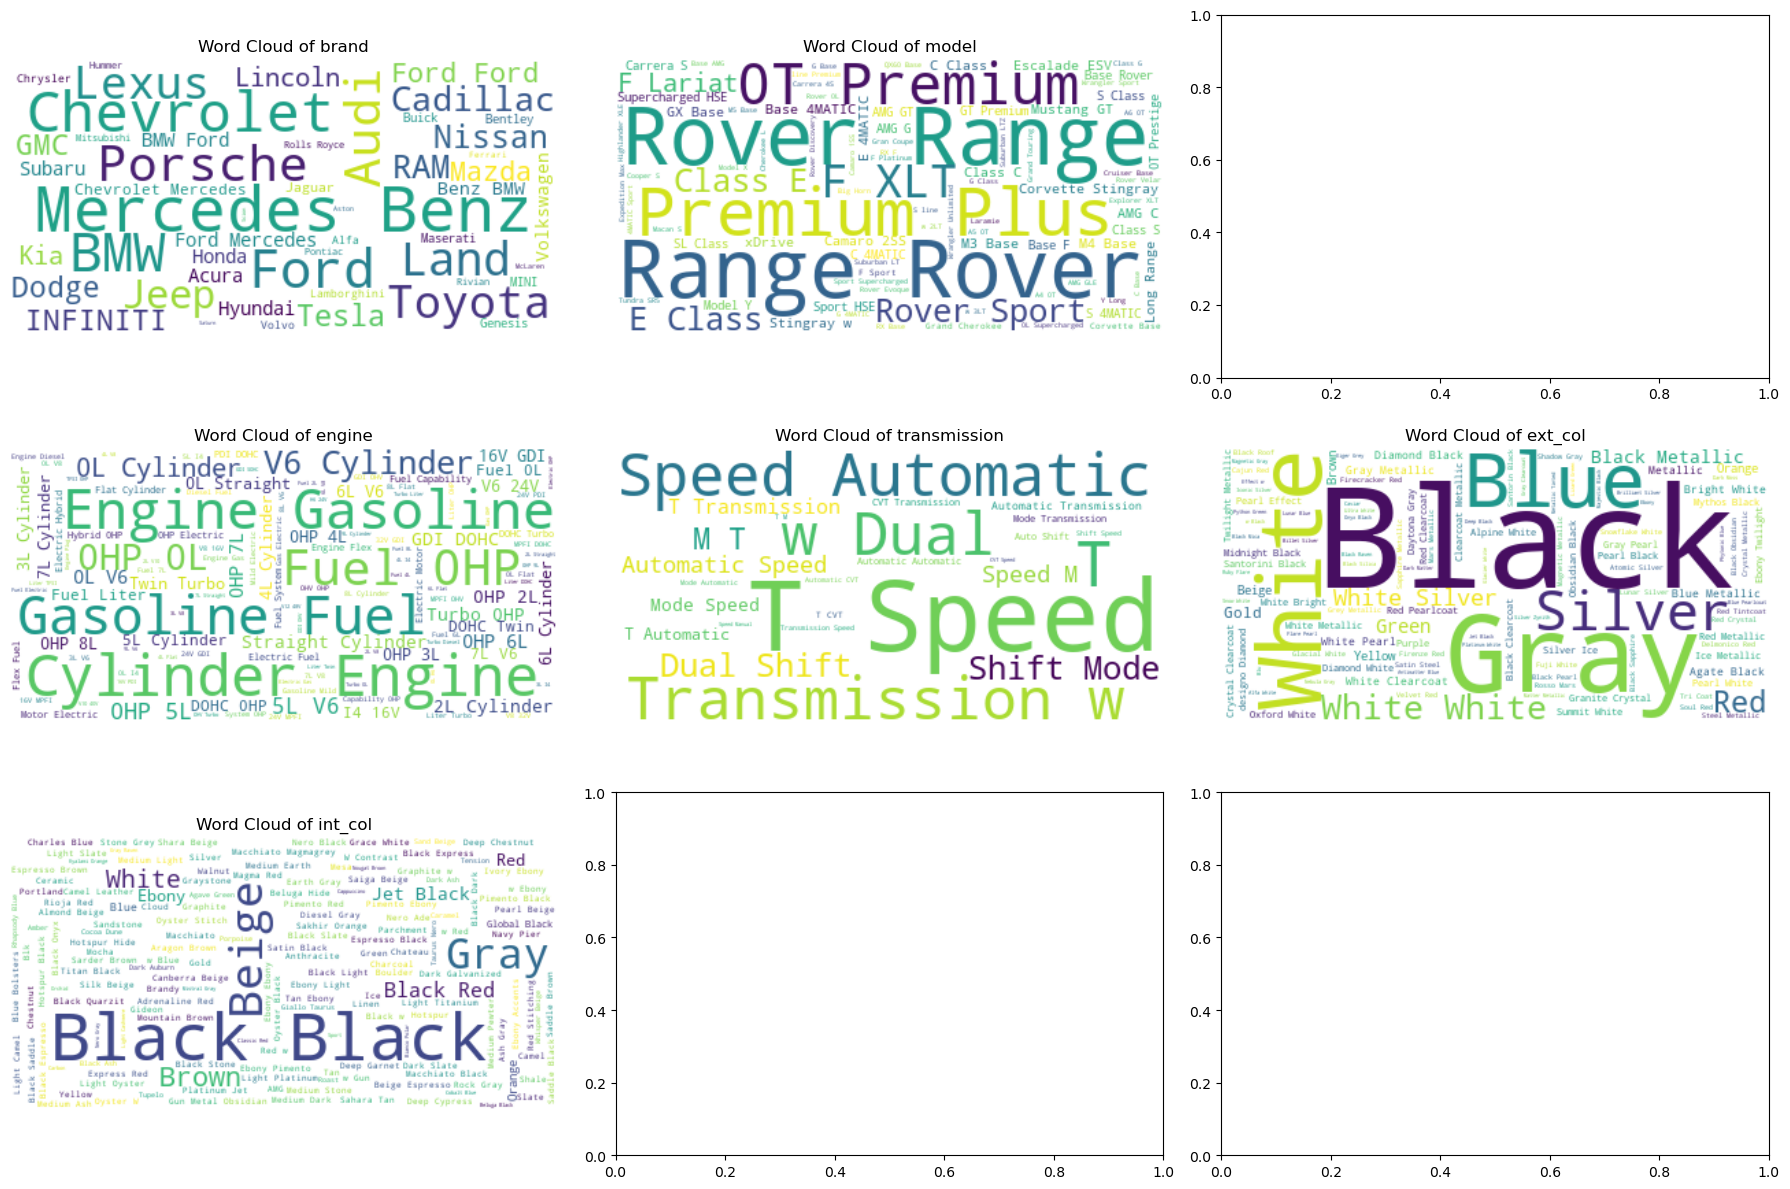

In [28]:
def wordclouds(train):
    """
    Generates word clouds for text columns in a DataFrame, presenting 3 per row.

    Args:
    train: The DataFrame containing text columns.

    Returns:
    None (displays word clouds in the current figure).
    """

    cat_columns = train.select_dtypes(exclude="number").columns
    unconvertable_features = []

    # Iterate through convertible columns, creating subplots for 3 per row
    num_cols = len(cat_columns)
    rows = (num_cols + 2) // 3  # Number of rows for 3 word clouds per row (ceil division)

    fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4))  # Adjust figsize as needed

    col_index = 0
    for i in range(rows):
        for j in range(3):
            if col_index >= num_cols:
                # Clear unused subplots (optional for aesthetics)
                axes[i, j].axis('off')
                continue

            col = cat_columns[col_index]
            try:
                # Combine all text into a single string
                text = " ".join(train[col])

                # Create a WordCloud object (adjust width, height, and background_color as needed)
                wordcloud = WordCloud(width=400, height=200, background_color="white")

                # Generate the word cloud using the prepared text
                wordcloud.generate(text)

                # Display the word cloud
                axes[i, j].imshow(wordcloud, interpolation='bilinear')
                axes[i, j].set_title(f"Word Cloud of {col}")
                axes[i, j].axis('off')  # Remove axes for a cleaner visualization

            except:
                unconvertable_features.append(col)
                print(f"The feature {col} includes non-text data and is skipped.")

            col_index += 1

    plt.tight_layout()  # Adjust spacing between subplots (optional)
    plt.show()
    
wordclouds(train_copy)

<section id="sec2.6"> </section>
<h2>Correlation</h2>
Check current correlation of numerical values
</br></br>
<a href="#sec2" style="text-decoration: none; color: #333;">Back to visualization list</a>

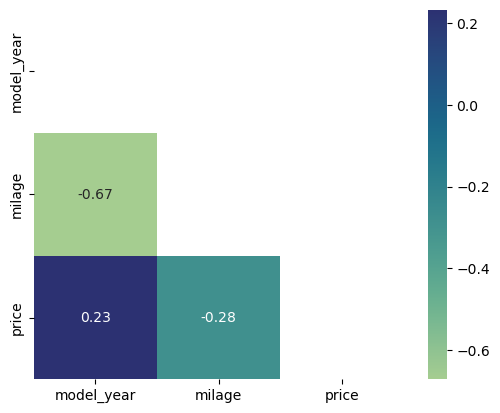

In [7]:
def correlation(train): 
    tmp = train.select_dtypes(include='number').corr("pearson")
    mask = np.triu(np.ones_like(tmp, dtype=bool))
    sns.heatmap(tmp,annot=True, mask=mask,cmap ="crest",square=True)
correlation(train_copy)

There is a relatively strong Correlation between model_year and milage to price
<ul>
<li>Price ----------- Model_year 0.23</li>
<li>Price ----------- Milage  -0.28</li>
</ul>

<section id="sec2.7"> </section>
<h2>Target relationships with other columns</h2>
Check current correlation of numerical values
</br></br>
<a href="#sec2" style="text-decoration: none; color: #333;">Back to visualization list</a>

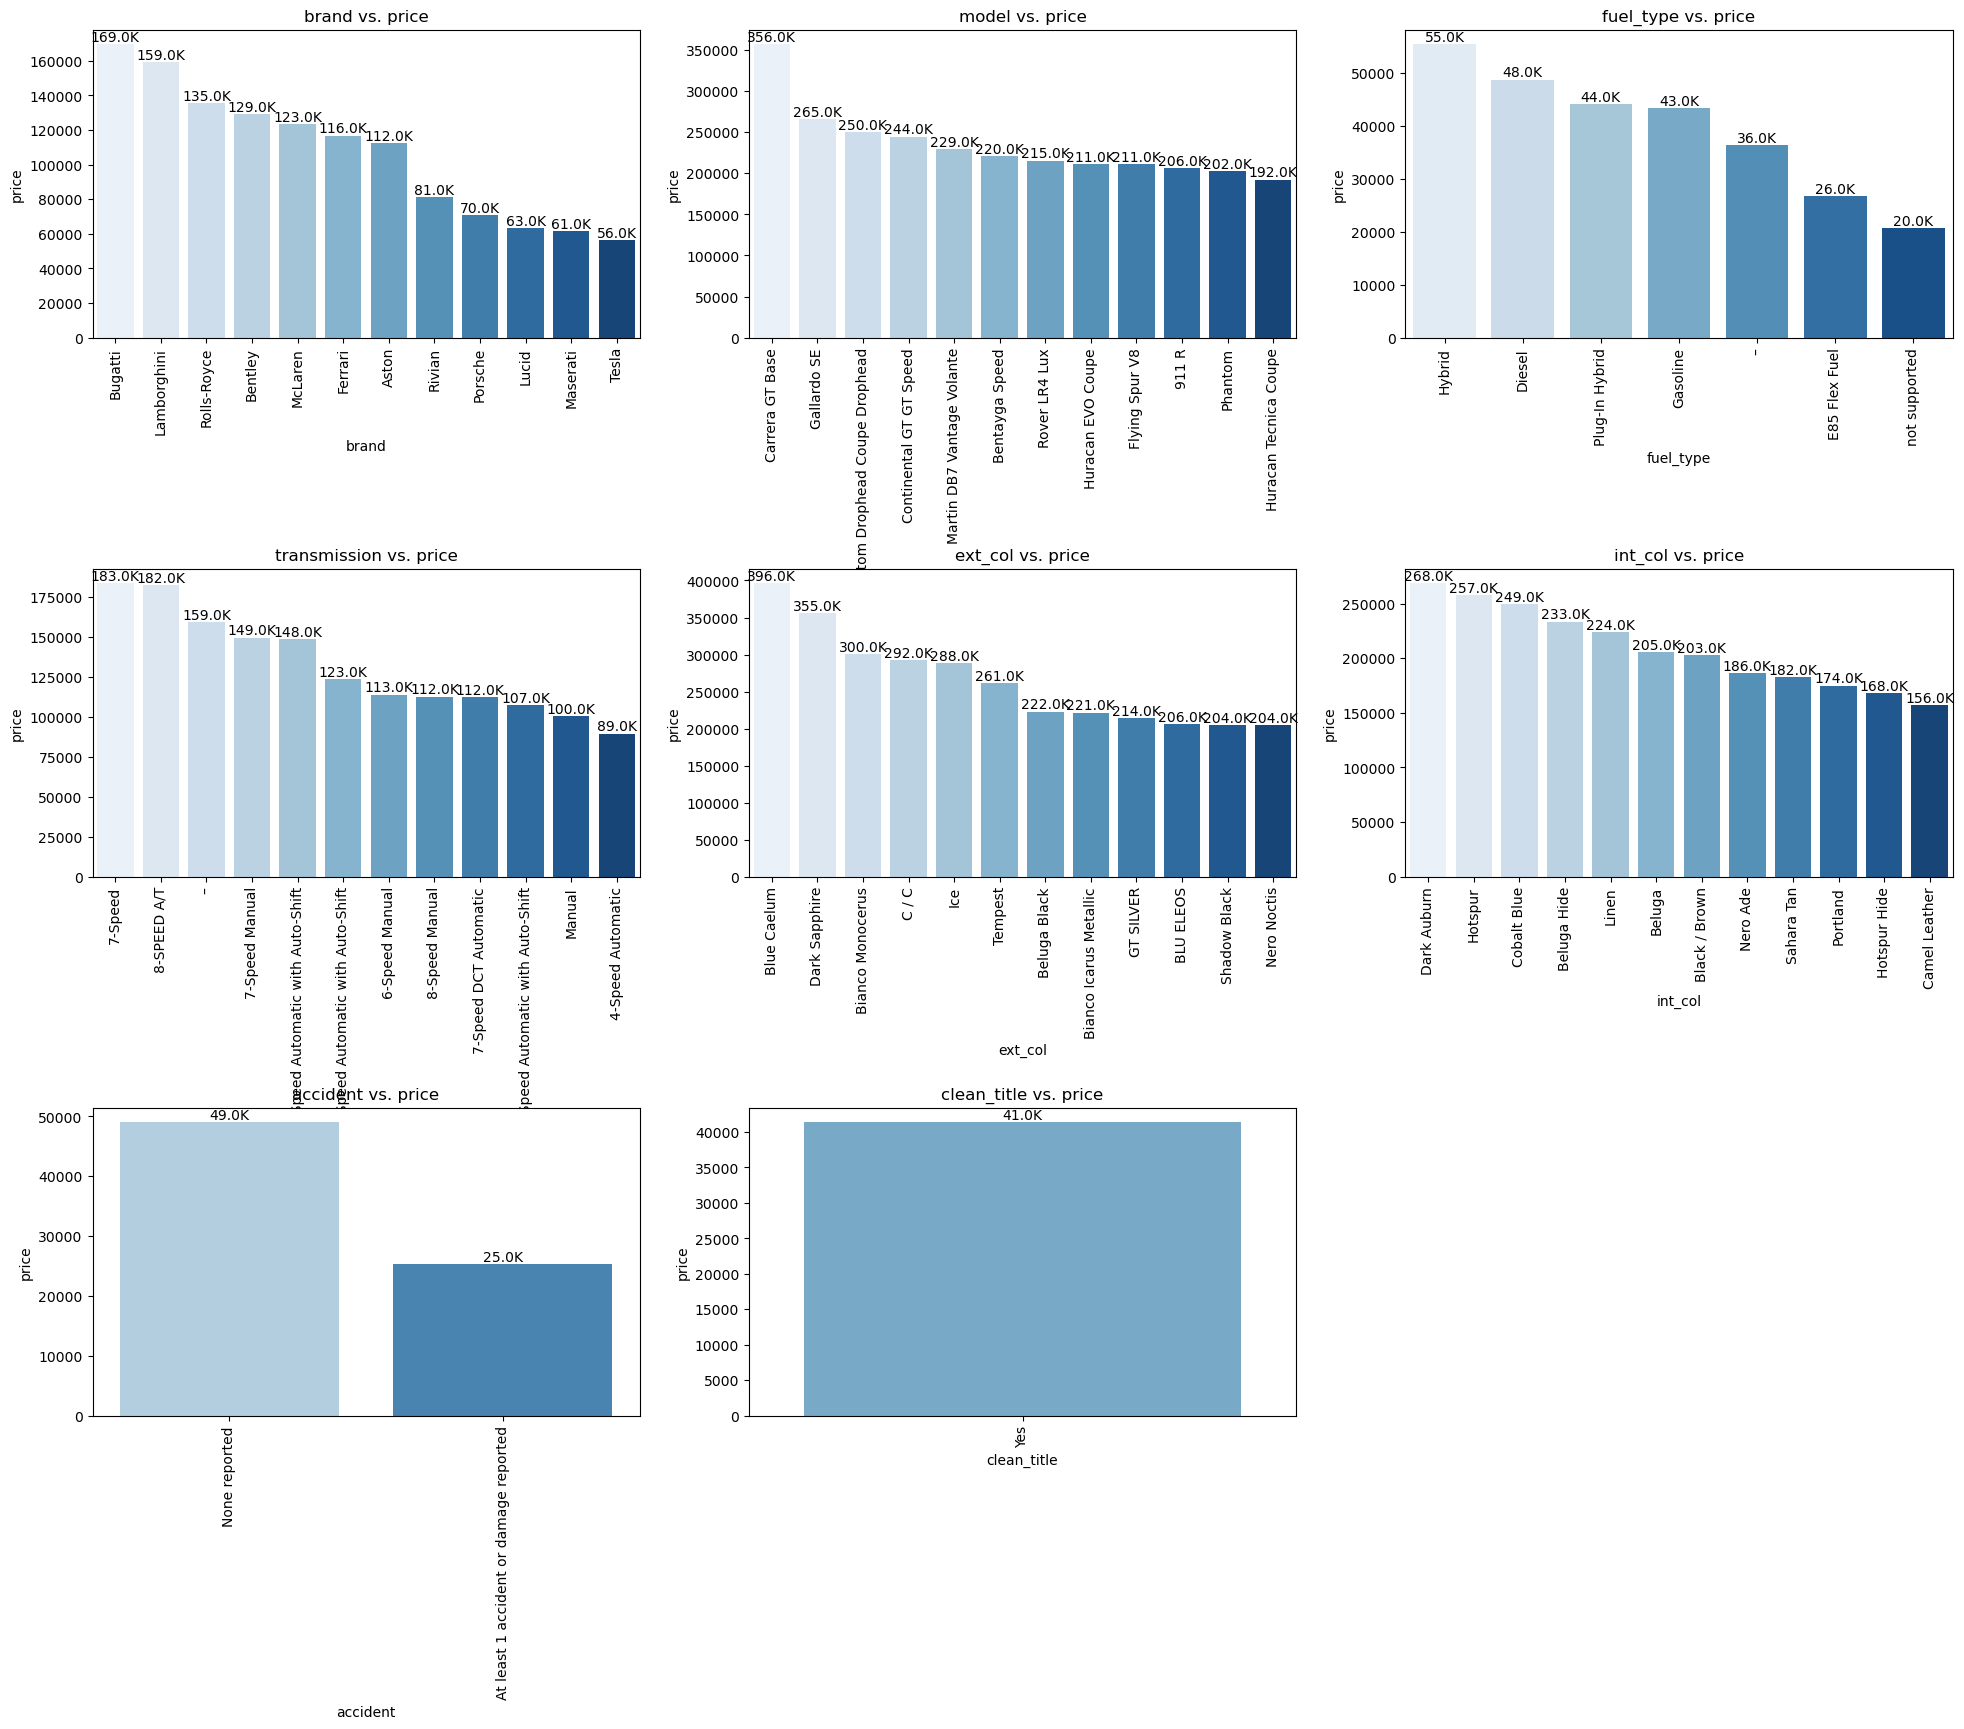

In [30]:
def barplot_target_relationships(train, target, cat_columns, top_n=12):
    """
    Generates barplots to visualize the relationship between a target column and categorical columns, displaying only the top N categories with a blue colormap and value annotations.

    Args:
    train: The DataFrame containing the data.
    target: The name of the target column.
    cat_columns: A list of categorical column names.
    top_n: The number of top categories to display (default: 20).

    Returns:
    None (displays the barplots).
    """

    num_cols = len(cat_columns)
    rows = (num_cols + 2) // 3  # Number of rows for subplots (ceil division)

    fig, axes = plt.subplots(rows, 3, figsize=(24, rows * 6))  # Adjust figsize as needed
    plt.subplots_adjust(hspace=0.75)

    col_index = 0
    for i in range(rows):
        for j in range(3):
            if col_index >= num_cols:
                # Clear unused subplots (optional for aesthetics)
                axes[i, j].axis('off')
                continue

            col = cat_columns[col_index]

            # Group by the categorical column and calculate the mean of the target column
            grouped_data = train.groupby(col)[target].mean().reset_index()

            grouped_data = grouped_data.sort_values(by=target, ascending=False)
            top_categories = grouped_data.head(top_n)

            # Create a colormap based on target values (higher -> bluer)
            palette = sns.color_palette("Blues", n_colors=len(top_categories))
            norm = plt.Normalize(top_categories[target].max(), top_categories[target].min())
            
            # Create a barplot with color based on target value
            sns.barplot(x=col, y=target, data=top_categories, ax=axes[i, j], palette=palette)

            # Set plot titles and labels
            axes[i, j].set_title(f"{col} vs. {target}")
            axes[i, j].set_xlabel(col)
            axes[i, j].set_ylabel(target)

            # Annotate with target values
            for p in axes[i, j].patches:
                height = p.get_height()
                axes[i, j].annotate(f"{height // 1000}K", xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

                axes[i, j].tick_params(axis='x', rotation=90)

            col_index += 1

    plt.show()

# Example usage:
cat_columns = train_copy.drop('engine',axis=1).select_dtypes(exclude='number').columns.tolist() # Replace with your actual column names
barplot_target_relationships(train_copy, target, cat_columns)

<section id="sec3"> </section>
<h1>Preprocessing</h1>
In this part I will start by creating a baseline which later I will be able to see how the processing affects the data 
In this section the changes I will make to the data include 
</br></br>
<p style = "font-weight:bold"><a href="#sec3.1.6" style="text-decoration: none; color: #333;">Model Evalutions</a></p>
<ol>
<li><a href="#sec3.1.1" style="text-decoration: none; color: #333;">Baseline</a></li>
<li><a href="#sec3.1.2" style="text-decoration: none; color: #333;">All features with basic manipulation</a></li>
<li><a href="#sec3.1.3" style="text-decoration: none; color: #333;">Feature engineering</a></li>
<li><a href="#sec3.1.4" style="text-decoration: none; color: #333;">Categorical encoding</a></li>
<li><a href="#sec3.1.5" style="text-decoration: none; color: #333;">Normaliztion/standardization</a></li>
</ol>

<ol>
<li><a href="#sec3.2" style="text-decoration: none; color: #333;">handling missing values</a></li>
<li><a href="#sec3.3" style="text-decoration: none; color: #333;">Feature engineering</a></li>
<li><a href="#sec3.4" style="text-decoration: none; color: #333;">Categorical data encoding</a></li>
<li><a href="#sec3.5" style="text-decoration: none; color: #333;">Normalization and standardization</a></li>
</ol>

<a href="#back" style="text-decoration: none; color: #333;">Back to table of contents</a>

<section id="sec3.1.6"> </section>
<h3>Model Evaluations</h3>

<a href="#sec3" style="text-decoration: none; color: #333;">Back to Preprocessing list</a>

In [8]:
# Create loss metric
def custom_rmse(y_true, y_pred, is_log_transformed=False):
    if is_log_transformed:
        y_pred = np.exp(y_pred)
        y_true = np.exp(y_true)
    return -np.sqrt(mean_squared_error(y_true, y_pred))

In [9]:
# Function that evalute different models
def evaluate_models(train, y, only_numerical, is_log_transformed=False):
    # Create Kfold for the cross validation
    cv = KFold(n_splits=5, shuffle=True)
    rmse_scorer = make_scorer(custom_rmse, greater_is_better=False, is_log_transformed=is_log_transformed)
    
    # Defind models
    if only_numerical == True:
        models = [
            CatBoostRegressor(verbose = False),
            LGBMRegressor(verbose = -1),
            XGBRegressor(),
            RandomForestRegressor(),
            GradientBoostingRegressor(),
            LinearRegression(),  
        ]
        models_names = ["CatBoostRegressor", "LGBMRegressor", "XGBRegressor","RandomForestRegressor","GradientBoostingRegressor","LinearRegression"]
    
    else:
        cat_features = train.select_dtypes(exclude='number').columns.tolist()
        
        models = [
        CatBoostRegressor(cat_features= cat_features, verbose = False),
        LGBMRegressor(cat_features = cat_features,verbose = -1),
        XGBRegressor(enable_categorical=True),
    ]
        models_names = ["CatBoostRegressor", "LGBMRegressor", "XGBRegressor"]
        
    cv_results = []
    for model in models :
        cv_results.append(cross_val_score(model, train, y = y,
            scoring = rmse_scorer, cv = cv, n_jobs=-1))

    cv_means = []
    cv_std = []
    for cv_result in cv_results:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    cv_res = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Algorithm": models_names
    })

    print(cv_res)

<section id="sec3.1.1"> </section>
<h3>Baseline</h3>

<a href="#sec3" style="text-decoration: none; color: #333;">Back to Preprocessing list</a>

In [10]:
print("Baseline - numerical features only")

start_time = time.time()
X_tmp = train.select_dtypes(include='number').drop(target,axis=1)
y_tmp = train[target]
evaluate_models(X_tmp,y_tmp, True, False)

end_time = time.time()

elapsed_time = end_time - start_time
print("Evaluation time:", elapsed_time, "seconds")

Baseline - numerical features only
   CrossValMeans  CrossValerrors                  Algorithm
0   75041.083888     6519.995343          CatBoostRegressor
1   74395.227757     4063.996916              LGBMRegressor
2   75696.900088     4794.122243               XGBRegressor
3   79478.156229     4798.890139      RandomForestRegressor
4   74223.150291     3783.675432  GradientBoostingRegressor
5   75432.171938     2186.774808           LinearRegression
Evaluation time: 224.93182229995728 seconds


<h4>Insight</h4>
<li>It can seen the Baseline performs far from the optimal results that are leading this competition.</li>
<li>It performs poorly becuase it only contains the numerical features.
That is why the LinearRegression model performed the best, the model is not complexed with only 2 features.</li>
<li>Another huge insight is that the transformed log version of the price target column perform  consistently better then the default version. Therefore it will be used as the new target column</li>

<section id="sec3.2"> </section>
<h2> Missing values </h2>
According to the graph there is not a single feature that cross the 20% missing data which is good.
After studying the features I used fillna and filled the values according to the best possible
<ul>
<li>clean title Nans were filled to "No"</li>
<li>fuel_type Nans were filled to "Unknown"</li>
<li>accident Nans were filled to "None reported"</li>
</ul>

<a href="#sec3" style="text-decoration: none; color: #333;">Back to Preprocessing list</a>

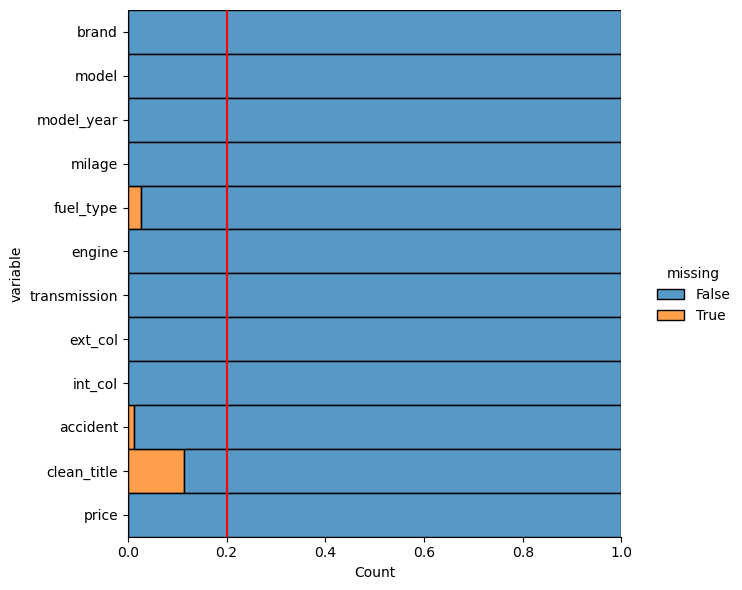

In [11]:
def plot_nans(df):
    sns.displot(
        data=df.isnull().melt(value_name='missing'),
        y='variable',
        hue='missing',
        multiple='fill',
        height=6,
        aspect=1.1
    )

    # specifying a threshold value
    plt.axvline(0.2, color='r')
plot_nans(train)

In [12]:
dataframes = [train, test]
# Fills Nans according 
def fillNan(dataframes):
    for df in dataframes:
        df["clean_title"].fillna("No", inplace = True)
        df["fuel_type"].fillna("Unknown", inplace = True)
        df["accident"].fillna("None reported", inplace = True)
        

# Creating a list of categorical data
def convert_to_category(dataframes):
    for df in dataframes:
        for feature in df.select_dtypes(exclude='number').columns.tolist():
            df[feature] = df[feature].astype('category')
        
fillNan(dataframes)
convert_to_category(dataframes)

<section id="sec3.1.2"> </section>
<h3>Evalution After basic manipulation</h3>

<a href="#sec3" style="text-decoration: none; color: #333;">Back to Preprocessing list</a>

In [298]:
print("Evalution - all features with basic model configuration")
X_tmp = train.drop(target,axis=1)
y_tmp = train[target]
evaluate_models(X_tmp, y_tmp, False, False)  

<section id="sec3.3"> </section>
<h2>Feature Engineering</h2>

<a href="#sec3" style="text-decoration: none; color: #333;">Back to Preprocessing list</a>

In [14]:
def extract_engine_info(description):
    # Initialize default values
    horsepower = None
    engine_size = None
    cylinders = None

    if pd.isna(description):
        return horsepower, engine_size, cylinders
    # Convert to string if it's not already
    description = str(description)

    # Extract horsepower
    hp_match = re.search(r'(\d+(?:\.\d+)?)\s*HP', description, re.IGNORECASE)
    #print(hp_match)
    if hp_match:
        horsepower = float(hp_match.group(1))
        
    # Extract engine size
    size_match = re.search(r'(\d+(?:\.\d+)?)\s*L', description, re.IGNORECASE)
    if size_match:
        engine_size = float(size_match.group(1))

    # Extract cylinder count
    cyl_patterns = [
        r'(\d+)\s*(?:Cylinder|Cyl)',  # "4 Cylinder" or "4 Cyl"
        r'V(\d+)',                    # "V6", "V8", etc.
        r'(\d+)V',                    # "16V", "24V", etc.
    ]
    
    for pattern in cyl_patterns:
        cyl_match = re.search(pattern, description, re.IGNORECASE)
        if cyl_match:
            cylinders = cyl_match.group(1)
            break  # Stop after finding the first match

    return horsepower, engine_size, cylinders

In [15]:
def extract_transmission_info(description):
    # Initialize default values
    speed = None
    transmission_type = None

    if pd.isna(description):
        return speed, transmission_type
    # Convert to string if it's not already
    description = str(description)

    # Extract speed
    speed_match = re.search(r'(\d+)(?:-Speed)?', description, re.IGNORECASE)
    if speed_match:
        speed = speed_match.group(1)

    # Extract transmission type
    type_map = {
        'A/T': 'Automatic',
        'M/T': 'Manual',
        'CVT': 'CVT',
        'DCT': 'DCT'
    }

    for key, value in type_map.items():
        if re.search(r'\b' + re.escape(key) + r'\b', description, re.IGNORECASE) or \
           re.search(r'\b' + re.escape(value) + r'\b', description, re.IGNORECASE):
            transmission_type = value
            break

    if not transmission_type:
        if re.search(r'\b(automatic|auto)\b', description, re.IGNORECASE):
            transmission_type = 'Automatic'
        elif re.search(r'\b(manual|man)\b', description, re.IGNORECASE):
            transmission_type = 'Manual'
        elif 'dual shift' in description.lower() or 'dct' in description.lower():
            transmission_type = 'DCT'

    return speed, transmission_type

In [16]:
def create_feature_engine_and_transmission(train):
    # Extract engine and transmission information using a list comprehension for efficiency
    engine_info = [extract_engine_info(engine_desc) for engine_desc in train["engine"]]
    transmission_info = [extract_transmission_info(transmission_desc) for transmission_desc in train["transmission"]]
    
    # Create a DataFrame from the extracted information and add features to the original dataframe
    new_features_engine = pd.DataFrame(engine_info, index=train.index, columns=["horsepower", "engine_size", "cylinders"])
    new_features_transmission = pd.DataFrame(transmission_info, index=train.index, columns=["speed", "transmission_type"])
    
    # Combine the new features into a single DataFrame and then combine then into the original
    new_features = pd.concat([new_features_engine, new_features_transmission], axis=1)
    train = pd.concat([train, new_features], axis=1)

    # Print NaN counts for verification
    print(f"NaNs values in each of the dataframe new features")
    for feature in new_features.columns:
        print(f"NaNs in {feature}: {train[feature].isna().sum()}")
    # Return the dataframe with the added features
    return train

In [17]:
def create_luxury_features(train, test): 
    for col in ['brand','model','int_col','ext_col']:
        average_prices = train.groupby(col)[target].mean()

      # Create a boolean mask for luxury brands
        luxury_mask = average_prices > train[target].mean() + train[target].std()

      # Assign 1 for luxury brands and 0 for non-luxury brands
        for df in [train,test]:
            df[f"Luxury_{col}"] = df[col].apply(lambda brand: 1 if brand in luxury_mask.index and luxury_mask[brand] else 0)
            print(f"amount of luxury {col} in train is: {len(df[df[f'Luxury_{col}'] == 1])}")
            df[f"Luxury_{col}"] = df[f"Luxury_{col}"].astype(bool)     

In [18]:
# Feature engineering main function
def feature_engineering(train):
    """
    This function uses other functions built before and create new features
    (Uses the function create_feature_engine_and_transmission)
    Args:
    train: The DataFrame containing the data.

    Returns:
    The train dataframe with the new features
    
    """
    train = create_feature_engine_and_transmission(train)
    
    current_year = datetime.datetime.now().year
    train["age"] = current_year - train["model_year"]
    train["millage_per_year"] = np.where(train["age"] == 0, train["milage"], train["milage"] / train["age"])
    train['power_to_weight_ratio'] = train['horsepower'] / train['engine_size']
    
    try:
        train.drop(columns= ["model_year", "engine", "transmission"],axis=1,inplace=True)
    except:
        print("already dropped excessive columns")
        
    return train

In [19]:
def fillNan_feature_engineering(dataframes):
    for df in dataframes:
        df["horsepower"].fillna(df["horsepower"].mean(), inplace = True)
        df["engine_size"].fillna(df["engine_size"].mean(), inplace = True)
        df["cylinders"].fillna(df["cylinders"].mode().iloc[0], inplace = True)
        df["power_to_weight_ratio"].fillna(df["power_to_weight_ratio"].mean(),inplace=True)
        df["transmission_type"].fillna("unspecified", inplace = True)
        df["speed"].fillna("unknown", inplace = True)

<h3> Run the functions </h3>

In [20]:
# Utilize the functions created to create the features
train = feature_engineering(train)
test = feature_engineering(test)
create_luxury_features(train, test)

fillNan_feature_engineering([train,test])

# Convert the new features from object type to category type using the existing  function 
convert_to_category([train,test])

NaNs values in each of the dataframe new features
NaNs in horsepower: 33259
NaNs in engine_size: 6698
NaNs in cylinders: 14277
NaNs in speed: 84286
NaNs in transmission_type: 613
NaNs values in each of the dataframe new features
NaNs in horsepower: 22181
NaNs in engine_size: 4380
NaNs in cylinders: 9441
NaNs in speed: 56065
NaNs in transmission_type: 436
amount of luxury brand in train is: 2775
amount of luxury brand in train is: 1887
amount of luxury model in train is: 3471
amount of luxury model in train is: 2397
amount of luxury int_col in train is: 967
amount of luxury int_col in train is: 642
amount of luxury ext_col in train is: 1447
amount of luxury ext_col in train is: 998


<section id="sec3.1.3"> </section>
<h3>Evaluation feature engineering</h3>

<a href="#sec3" style="text-decoration: none; color: #333;">Back to Preprocessing list</a>

In [21]:
print("Model evaluation after feature engineering")

start_time = time.time()
X_tmp = train.drop(target,axis=1)
y_tmp = train[target]
evaluate_models(X_tmp, y_tmp, False, False)
end_time = time.time()

elapsed_time = end_time - start_time
print("Evaluation time:", elapsed_time, "seconds")

Model evaluation after feature engineering
   CrossValMeans  CrossValerrors          Algorithm
0   72979.788548     2710.456003  CatBoostRegressor
1   73847.097632     3544.729953      LGBMRegressor
2   78034.927532     6649.672470       XGBRegressor
Evaluation time: 1283.3375177383423 seconds


<section id="sec3.4"> </section>
<h2>Categorical data encoding</h2>

<a href="#sec3" style="text-decoration: none; color: #333;">Back to Preprocessing list</a>

In [22]:
def encode_categorical_features(df, test, categorical_columns):
    """
    Encodes categorical features based on the number of unique values.
    
    args:
    df - the dataframe train set 
    test - the dataframe test 
    categorical_columns - a list of all the categorical features
    """
    low_unique_cols, high_unique_cols = [],[]
    for col in categorical_columns:
        unique_values = df[col].nunique()

        if unique_values <= 15:
            low_unique_cols.append(col)
        else:
            high_unique_cols.append(col)
            
    # One-hot encoding for columns with fewer than 15 unique values
    df = pd.get_dummies(df,columns = low_unique_cols)
    test = pd.get_dummies(test,columns = low_unique_cols) 
    
    # Target Encode for columns with 15 or more unique values 
    y = df[target]
    encoder = TargetEncoder(cols=high_unique_cols)
    df = encoder.fit_transform(df.drop(target,axis=1), y)
    df[target] = y
    test = encoder.transform(test)

    display(df.head(1),df.shape)
    display(test.head(1),test.shape)
    return df,test

In [23]:
# Use the function created
cat_features = train.select_dtypes(exclude='number').columns.tolist()
train, test = encode_categorical_features(train, test, cat_features)

,brand,model,milage,ext_col,int_col,horsepower,engine_size,age,millage_per_year,power_to_weight_ratio,...,transmission_type_unspecified,Luxury_brand_False,Luxury_brand_True,Luxury_model_False,Luxury_model_True,Luxury_int_col_False,Luxury_int_col_True,Luxury_ext_col_False,Luxury_ext_col_True,price
0,17162.015977,12832.716263,213000,43366.336401,28182.418129,172.0,1.6,17,12529.411765,107.5,...,False,True,False,True,False,True,False,True,False,4200


(188533, 58)

,brand,model,milage,ext_col,int_col,horsepower,engine_size,age,millage_per_year,power_to_weight_ratio,...,transmission_type_Manual,transmission_type_unspecified,Luxury_brand_False,Luxury_brand_True,Luxury_model_False,Luxury_model_True,Luxury_int_col_False,Luxury_int_col_True,Luxury_ext_col_False,Luxury_ext_col_True
0,53204.88,20734.62176,98000,40803.542622,29953.997428,240.0,2.0,9,10888.888889,120.0,...,False,False,True,False,True,False,True,False,True,False


(125690, 57)

<section id="sec3.1.4"> </section>
<h3>Evaluation Categorical encoding</h3>

<a href="#sec3" style="text-decoration: none; color: #333;">Back to Preprocessing list</a>

In [24]:
print("Model evaluation after categorical encoding")

start_time = time.time()
X_tmp = train.drop(target,axis=1)
y_tmp = train[target]
evaluate_models(X_tmp, y_tmp, True, False)
end_time = time.time()

elapsed_time = end_time - start_time
print("Evaluation time:", elapsed_time, "seconds")

Model evaluation after categorical encoding
   CrossValMeans  CrossValerrors                  Algorithm
0   74125.267894     2484.262962          CatBoostRegressor
1   72765.463577     5930.700465              LGBMRegressor
2   76565.955320     5425.470152               XGBRegressor
3   76772.208115     7048.108162      RandomForestRegressor
4   72512.153297     9032.921449  GradientBoostingRegressor
5   72722.474391     7245.241571           LinearRegression
Evaluation time: 1830.0543315410614 seconds


<h3>Visualize Results</h3>
Visualize the results to see how the new feature incorporate in the exsisting dataset 

,count,mean,std,min,25%,50%,75%,max
brand,188533.000000,43876.967423,16817.493654,14653.743447,34801.090131,41004.856985,51244.399541,159176.012361
model,188533.000000,44019.843949,25446.818512,9541.777074,26555.580988,38545.080808,55430.362955,220125.812301
milage,188533.000000,65705.295174,49798.158076,100.000000,24115.000000,57785.000000,95400.000000,405000.000000
ext_col,188533.000000,43656.556420,13243.341829,23090.873501,40658.658811,42417.511447,42417.511447,243341.097871
int_col,188533.000000,43748.347800,13472.724550,28182.418129,41784.493702,45524.117958,45524.117958,241554.565191
horsepower,188533.000000,343.263856,104.123406,70.000000,280.000000,343.263856,395.000000,1020.000000
engine_size,188533.000000,3.775396,1.328223,0.650000,3.000000,3.500000,4.700000,8.400000
age,188533.000000,8.170002,5.660967,0.000000,4.000000,7.000000,11.000000,50.000000
millage_per_year,188533.000000,8696.321414,6272.787877,5.263158,5166.666667,8000.000000,11000.000000,235000.000000
power_to_weight_ratio,188533.000000,93.460845,24.385155,27.692308,75.000000,93.460845,107.142857,261.538462


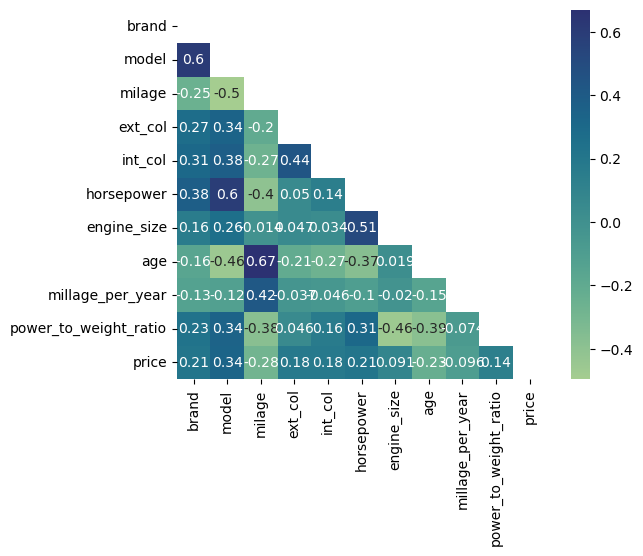

In [25]:
display(train.describe().T\
    .style.bar(subset=['mean'], color=px.colors.qualitative.G10[2])\
    .background_gradient(subset=['std'], cmap='Blues')\
    .background_gradient(subset=['50%'], cmap='BuGn'))

# Correlation
correlation(train)

<h3> Mutual Information</h3>
Evaluate Mutual Infromation to identify the features that contribute the most to the model

In [27]:
# determine the mutual information for numerical features
def mutual_info(train):
    y_sampled = train[target]
    mutual_df = train.drop(target,axis=1)
    
    # Mutual Info function
    start_time = time.time()
    mutual_info = mutual_info_regression(mutual_df, y_sampled, discrete_features='auto')
    end_time = time.time()
    
    # Create the mutual information table
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = mutual_df.columns
    mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False))
    mutual_info = mutual_info.style.background_gradient("cool")
    
    display(mutual_info)
    elapsed_time = end_time - start_time
    print("Evaluation time:", elapsed_time, "seconds")
    
mutual_info(train)

,0
milage,0.659976
horsepower,0.543784
age,0.541443
power_to_weight_ratio,0.512760
model,0.437466
millage_per_year,0.207181
engine_size,0.180988
clean_title_Yes,0.160642
clean_title_No,0.160307
brand,0.151035


Evaluation time: 110.62214374542236 seconds


<section id="sec3.5"> </section>
<h2>Normaliztion/standardization</h2>

<a href="#sec3" style="text-decoration: none; color: #333;">Back to Preprocessing list</a>

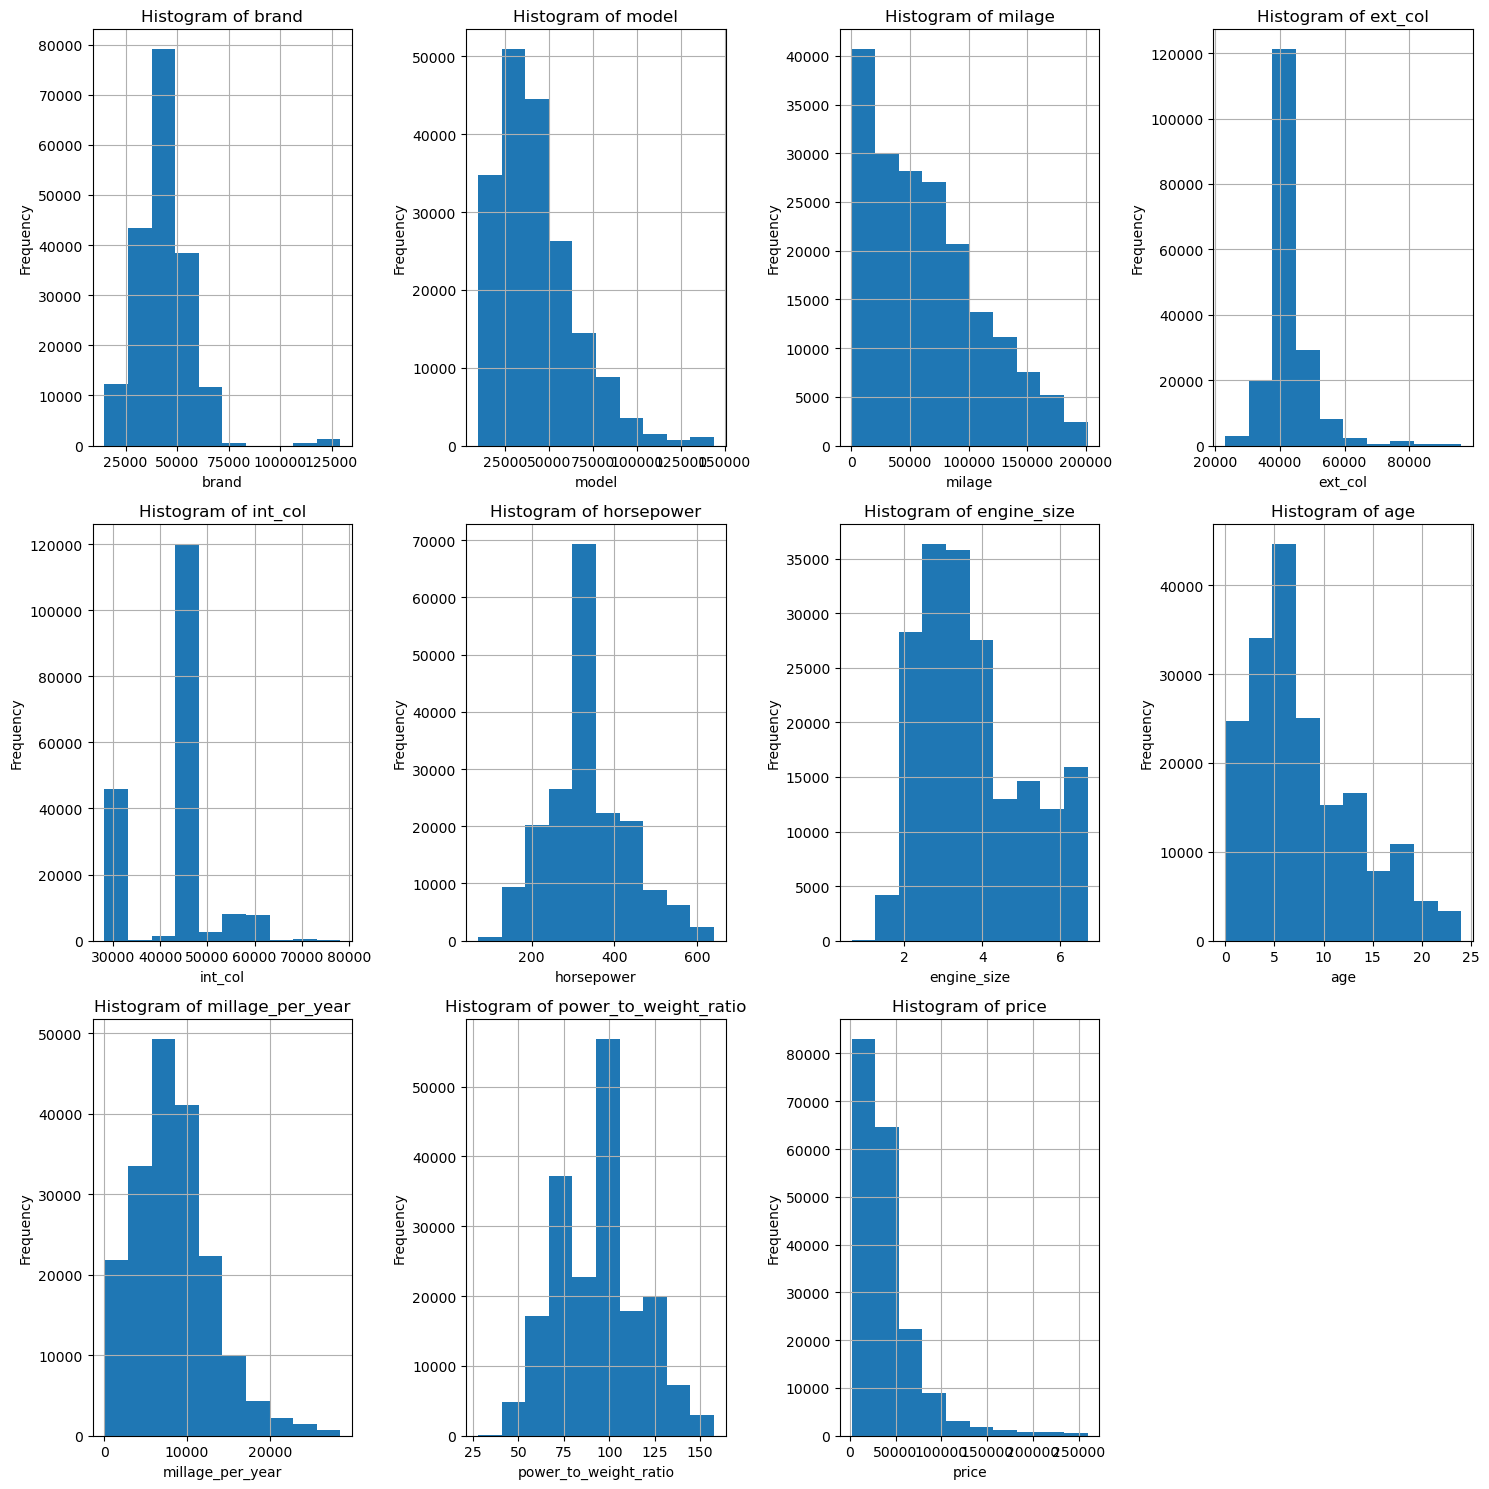

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import math

def histogram_new_features(df, rows):
    """
    Plots histograms for all numeric columns in the DataFrame 

    Args:
    df: The input DataFrame.
    rows: The number of rows in the grid layout.
    """
    df_cols = df.columns
    percentiles = df.quantile(0.99)
    
    cols_per_row = math.ceil(len(df_cols) / rows)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5*rows))
    
    # Ensure axes is always 2D
    if rows == 1:
        axes = axes.reshape(1, -1)
    elif cols_per_row == 1:
        axes = axes.reshape(-1, 1)

    for i, col in enumerate(df_cols):
        row, col_idx = i // cols_per_row, i % cols_per_row
        
        filtered_data = df[col][df[col] <= percentiles[col]]
        ax = axes[row, col_idx]
        filtered_data.hist(ax=ax)
        ax.set_title(f"Histogram of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")

    # Hide any unused subplots
    for i in range(len(df_cols), rows * cols_per_row):
        row, col_idx = i // cols_per_row, i % cols_per_row
        axes[row, col_idx].axis('off')

    plt.tight_layout()
    plt.show()

# Usage
num_columns = train.select_dtypes(include='number').columns.tolist()
histogram_new_features(train[num_columns], rows=3)

<h4>Insights</h4>
The distribution of poewr_to_weight_ratio and horsepower are relatively normally distibuted
On the other hand the distribution of millage is 
The skewness of the data has been significantly reduced after applying the logged target feature. Most features now exhibit a relatively normal distribution, with a few exceptions.
Also the majority of the data is already transformed because it is based on the already transformed target feature column.
</br>
Other then that those are the exceptions
<li>cylinders, age - have high skewness but are already transformed</li> 
<li>millage_per_year,power_to_weight_ratio, horsepower,milage - all have relativly high skewness and the data need to be transformed. Because of that the most suited is the robust scaling algorithm</li>

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew

def choose_scaling_technique(data):
    """
    Chooses the appropriate scaling technique (normalization or standardization) based on the data distribution.

    Args:
    data: The DataFrame containing the data.
    feature: The name of the feature to analyze.

    Returns:
    'normalize' if normalization is recommended, 'standardize' if standardization is recommended, or 'unknown' if the distribution is unclear.
    """
    results = []
    
    for feature in data.columns:
        # Calculate kurtosis and skewness
        kurtosis_value = kurtosis(data[feature])
        skewness_value = skew(data[feature])

        # Check for normality
        if abs(kurtosis_value) < 3 and abs(skewness_value) < 1.05:
            # Data is approximately normally distributed
            recommendation = 'standardize'
        elif abs(skewness_value) > 1:
            # Data is skewed
            recommendation = 'normalize'  # Consider normalization for skewed data
        else:
            # Unknown distribution
            recommendation = 'unknown'
        
        results.append({
            'Feature': feature,
            'Skewness': skewness_value,
            'kurtosis': kurtosis_value,
            'Recommendation': recommendation
        })
        
    return pd.DataFrame(results)

if __name__ == "__main__":

    results = choose_scaling_technique(train.select_dtypes(include='number'))
    display(results)


,Feature,Skewness,kurtosis,Recommendation
0,brand,3.097491,15.583882,normalize
1,model,1.788626,5.475691,normalize
2,milage,0.895055,0.678191,standardize
3,ext_col,7.054681,73.459180,normalize
4,int_col,5.377229,55.758521,normalize
5,horsepower,0.859967,2.121977,standardize
6,engine_size,0.491789,-0.561797,standardize
7,age,1.044503,0.749249,standardize
8,millage_per_year,5.437377,90.614739,normalize
9,power_to_weight_ratio,0.702659,1.322552,standardize


<h4>Insights</h4>
The skewness of the data has been significantly reduced after applying the logged target feature. Most features now exhibit a relatively normal distribution, with a few exceptions.
Also the majority of the data is already transformed because it is based on the already transformed target feature column.
</br>
Other then that those are the exceptions
<li>cylinders, age - have high skewness but are already transformed</li> 
<li>millage_per_year,power_to_weight_ratio, horsepower,milage - all have relativly high skewness and the data need to be transformed. Because of that the most suited is the robust scaling algorithm</li>

<section id="sec3.1.5"> </section>
<h3>Evaluation Normaliztion/standardization</h3>

<a href="#sec3" style="text-decoration: none; color: #333;">Back to Preprocessing list</a>

In [30]:
def scale_data(train, test, results, columns_to_scale):
    """
    Scales specified columns in both the training and testing data using appropriate scaling techniques based on their distributions.

    Args:
    train_data: A pandas DataFrame containing the training data.
    test_data: A pandas DataFrame containing the testing data.
    columns_to_scale: A list of column names to be scaled.

    Returns:
    A tuple containing the scaled training data and scaled testing data.
    """

    scaler_dict = {}  # Store scalers for each scaling technique
    scaler_dict['standardize'] = StandardScaler()
    scaler_dict['normalize'] = MinMaxScaler()

    # Scale columns using appropriate scalers
    for i, col in enumerate(columns_to_scale):
        scaler = scaler_dict[results.iloc[i]['Recommendation']]
        train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
        test[col] = scaler.transform(test[col].values.reshape(-1, 1))

    return train, test

columns_to_scale = train.drop('price', axis=1).select_dtypes(include='number').columns.tolist()
train, test = scale_data(train,test,results,columns_to_scale)

In [ ]:
print("Model evaluation after Normaliztion/standardization")
X_tmp = scaled_train.drop(target,axis=1)
y_tmp = scaled_train[target]

start_time = time.time()
evaluate_models(X_tmp, y_tmp, True, False)
end_time = time.time()
elapsed_time = end_time - start_time

print("Evaluation time:", elapsed_time, "seconds")

<section id="sec4"> </section>
<h1>Modeling and Evaluating</h1>
Because I already done multiple model evaluation tests, I am already familiar with what models performed better along the way of my pipline therefore I can skip that part and head to the other sectors
<ul>
    <li style="margin: 5px 0;"><a href="#sec4.1" style="text-decoration: none; color: #333;">Individual models Hyperparameters Tuning </a></li>
    <li style="margin: 5px 0;"><a href="#sec4.2" style="text-decoration: none; color: #333;">Ensemble model - stacking regressor</a></li>
    <li style="margin: 5px 0;"><a href="#sec4.3" style="text-decoration: none; color: #333;">Ensemble model - voting regressor </a></li> 
    <li style="margin: 5px 0;"><a href="#sec4.4" style="text-decoration: none; color: #333;">Ensemble Investigation </a></li>
 </ul>


<a href="#back" style="text-decoration: none; color: #333;">Back to table of contents</a>

In [36]:
# Set train test split in order to save 20 of the data for an unbiased evaluation after training the model on OOF 
y = train[target]
X = train.drop(target, axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

print(f"The Size of the train set is {X_train.shape}")
print(f"The Size of the validation set is {X_val.shape}")

The Size of the train set is (150826, 57)
The Size of the validation set is (37707, 57)


<section id="sec4.1"> </section>
<h2> Hyperparameters Tuning models </h2>
   
<a href="#sec4" style="text-decoration: none; color: #333;">Back to modeling and tuning list</a>

In [44]:
# Function to plot learning curves
def plot_learning_curve(model, X, y, cv):
    train_sizes, train_scores, valid_scores = learning_curve(model, X, y, cv=cv,
                                                             scoring=make_scorer(custom_rmse, greater_is_better=False),
                                                             train_sizes=np.linspace(0.1, 1.0, 5),
                                                             n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)  # Convert from negative RMSE to RMSE
    valid_scores_mean = np.mean(valid_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, label="Training RMSE")
    plt.plot(train_sizes, valid_scores_mean, label="Cross-Validation RMSE")
    plt.title(f"Learning Curve ({model.__class__.__name__})")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Optuna optimization functions for each model

# CatBoost
def objective_catboost(trial, X_train, y_train):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
        'random_strength': trial.suggest_uniform('random_strength', 1, 20),
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0, 1),
        'border_count': trial.suggest_int('border_count', 1, 255),
    }

    model = CatBoostRegressor(**params, verbose=0, early_stopping_rounds=50)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, scoring=make_scorer(custom_rmse, greater_is_better=False), cv=cv, n_jobs=-1)

    return np.mean(score)  # Optuna tries to minimize, so we negate RMSE


# XGBoost
def objective_xgboost(trial, X_train, y_train):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10),
    }

    model = XGBRegressor(**params)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, scoring=make_scorer(custom_rmse, greater_is_better=False), cv=cv, n_jobs=-1)

    return np.mean(score)


# LightGBM
def objective_lightgbm(trial, X_train, y_train):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
    }

    model = LGBMRegressor(**params)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, scoring=make_scorer(custom_rmse, greater_is_better=False), cv=cv, n_jobs=-1)

    return np.mean(score)


# RandomForest
def objective_randomforest(trial, X_train, y_train):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 4, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    }

    model = RandomForestRegressor(**params)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, scoring=make_scorer(custom_rmse, greater_is_better=False), cv=cv, n_jobs=-1)

    return np.mean(score)


# GradientBoosting
def objective_gbr(trial, X_train, y_train):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
    }

    model = GradientBoostingRegressor(**params)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, scoring=make_scorer(custom_rmse, greater_is_better=False), cv=cv, n_jobs=-1)

    return np.mean(score)

# LinearRegression (no hyperparameters to tune)
def objective_lr(trial, X_train, y_train):
    model = LinearRegression()
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, scoring=make_scorer(custom_rmse, greater_is_better=False), cv=cv, n_jobs=-1)

    return np.mean(score)


In [45]:
# Function to run hyperparameter tuning and plot learning curve for all models
def tune_model_with_learning_curve(model_name, X_train, y_train):
    if model_name == 'CatBoost':
        study = optuna.create_study(direction='minimize')
        study.optimize(lambda trial: objective_catboost(trial, X_train, y_train), n_trials=50)

        best_params = study.best_params
        print(f"Best parameters for {model_name}: {best_params}")

        # Train model with best parameters and plot learning curve
        model = CatBoostRegressor(**best_params, verbose=0, early_stopping_rounds=50)
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        plot_learning_curve(model, X_train, y_train, cv)

        return best_params

    elif model_name == 'XGBoost':
        study = optuna.create_study(direction='minimize')
        study.optimize(lambda trial: objective_xgboost(trial, X_train, y_train), n_trials=50)

        best_params = study.best_params
        print(f"Best parameters for {model_name}: {best_params}")

        model = XGBRegressor(**best_params)
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        plot_learning_curve(model, X_train, y_train, cv)

        return best_params

    elif model_name == 'LightGBM':
        study = optuna.create_study(direction='minimize')
        study.optimize(lambda trial: objective_lightgbm(trial, X_train, y_train), n_trials=50)

        best_params = study.best_params
        print(f"Best parameters for {model_name}: {best_params}")

        model = LGBMRegressor(**best_params)
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        plot_learning_curve(model, X_train, y_train, cv)

        return best_params

    elif model_name == 'RandomForest':
        study = optuna.create_study(direction='minimize')
        study.optimize(lambda trial: objective_randomforest(trial, X_train, y_train), n_trials=50)

        best_params = study.best_params
        print(f"Best parameters for {model_name}: {best_params}")

        model = RandomForestRegressor(**best_params)
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        plot_learning_curve(model, X_train, y_train, cv)

        return best_params

    elif model_name == 'GradientBoosting':
        study = optuna.create_study(direction='minimize')
        study.optimize(lambda trial: objective_gbr(trial, X_train, y_train), n_trials=50)

        best_params = study.best_params
        print(f"Best parameters for {model_name}: {best_params}")

        model = GradientBoostingRegressor(**best_params)
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        plot_learning_curve(model, X_train, y_train, cv)

        return best_params

    elif model_name == 'LinearRegression':
        print("No hyperparameters to tune for Linear Regression.")
        model = LinearRegression()
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        plot_learning_curve(model, X_train, y_train, cv)

        return "No hyperparameters tuned for Linear Regression."

<h4> Model Hypertuning </h4>

<p>while running certain models I have encountered several problem that includes randomforest trails taking too long (over 2 hours for 4 trials) and a simliar problem for the gradient descent boosting which didn't even complete a single trial in an hour.
Following those problems I have splited the code for a few blocks. the block of code are </p>
<ul>
    <li>catboost tuning</li>
    <li>xgboost, lightgbm, randomforset tuning</li>
    <li>linear regression (which only includes the graph of the learning curve)</li>
</ul>


[I 2024-10-10 23:58:29,122] A new study created in memory with name: no-name-17e4ca2d-8673-41e3-916b-90a405d9f594
[I 2024-10-11 00:00:37,352] Trial 0 finished with value: 72648.55553061477 and parameters: {'iterations': 583, 'depth': 9, 'learning_rate': 0.020155320071057393, 'l2_leaf_reg': 0.013153940078879397, 'random_strength': 16.358512150311853, 'bagging_temperature': 0.026853395649219514, 'border_count': 216}. Best is trial 0 with value: 72648.55553061477.
[I 2024-10-11 00:02:18,657] Trial 1 finished with value: 72730.76584257485 and parameters: {'iterations': 688, 'depth': 6, 'learning_rate': 0.024566853902534765, 'l2_leaf_reg': 0.002109696269860674, 'random_strength': 11.562167376757534, 'bagging_temperature': 0.33030696963103234, 'border_count': 29}. Best is trial 0 with value: 72648.55553061477.
[I 2024-10-11 00:02:59,688] Trial 2 finished with value: 72896.31838619642 and parameters: {'iterations': 217, 'depth': 6, 'learning_rate': 0.054548587048448754, 'l2_leaf_reg': 0.00476

[I 2024-10-11 00:45:31,115] Trial 24 finished with value: 72505.0699564563 and parameters: {'iterations': 396, 'depth': 5, 'learning_rate': 0.026423292284208758, 'l2_leaf_reg': 8.942846274099631, 'random_strength': 9.895617197027141, 'bagging_temperature': 0.5553946013230495, 'border_count': 191}. Best is trial 21 with value: 72469.71299249976.
[I 2024-10-11 00:46:34,743] Trial 25 finished with value: 73203.17135288248 and parameters: {'iterations': 617, 'depth': 5, 'learning_rate': 0.06479428086055058, 'l2_leaf_reg': 2.1810280963671147, 'random_strength': 11.968736919386542, 'bagging_temperature': 0.7037154259432774, 'border_count': 126}. Best is trial 21 with value: 72469.71299249976.
[I 2024-10-11 00:47:28,128] Trial 26 finished with value: 72563.77675672929 and parameters: {'iterations': 479, 'depth': 4, 'learning_rate': 0.022145883087706326, 'l2_leaf_reg': 4.5925412501793295, 'random_strength': 10.838917151189655, 'bagging_temperature': 0.42223518926466297, 'border_count': 100}. B

[I 2024-10-11 01:08:27,983] Trial 48 finished with value: 72490.92093411279 and parameters: {'iterations': 310, 'depth': 6, 'learning_rate': 0.05460845611316415, 'l2_leaf_reg': 7.643904087333739, 'random_strength': 5.6581261565875, 'bagging_temperature': 0.10579862429402026, 'border_count': 66}. Best is trial 21 with value: 72469.71299249976.
[I 2024-10-11 01:09:39,579] Trial 49 finished with value: 72794.75589644074 and parameters: {'iterations': 668, 'depth': 6, 'learning_rate': 0.054395497426104014, 'l2_leaf_reg': 9.825319174169696, 'random_strength': 7.087830030554553, 'bagging_temperature': 0.10424628916803462, 'border_count': 70}. Best is trial 21 with value: 72469.71299249976.


Best parameters for CatBoost: {'iterations': 586, 'depth': 5, 'learning_rate': 0.02282156461884929, 'l2_leaf_reg': 8.919099566374644, 'random_strength': 8.016992495855556, 'bagging_temperature': 0.3880252158141104, 'border_count': 72}


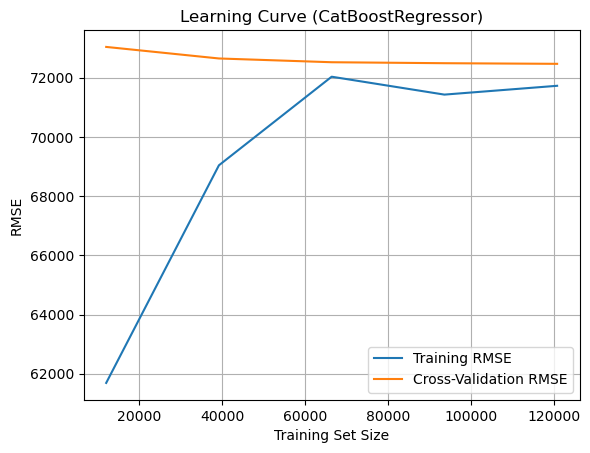

[I 2024-10-11 01:13:26,996] A new study created in memory with name: no-name-dc1890f1-ae79-4cc6-bf8d-c0d1094fff57
[W 2024-10-11 01:13:33,048] Trial 0 failed with parameters: {'n_estimators': 775, 'max_depth': 8, 'learning_rate': 0.022918629884567297, 'subsample': 0.851019074280841, 'colsample_bytree': 0.9530519255727482, 'reg_alpha': 0.21113517954926347, 'reg_lambda': 1.4562726872940654} because of the following error: ValueError('\nAll the 5 fits failed.\nIt is very likely that your model is misconfigured.\nYou can try to debug the error by setting error_score=\'raise\'.\n\nBelow are more details about the failures:\n--------------------------------------------------------------------------------\n5 fits failed with the following error:\nTraceback (most recent call last):\n  File "C:\\Users\\Nadav\\anaconda3\\Lib\\site-packages\\sklearn\\model_selection\\_validation.py", line 732, in _fit_and_score\n    estimator.fit(X_train, y_train, **fit_params)\n  File "C:\\Users\\Nadav\\anaconda3

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nadav\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nadav\anaconda3\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Nadav\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1090, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Nadav\anaconda3\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Nadav\anaconda3\Lib\site-packages\xgboost\training.py", line 182, in train
    if cb_container.after_iteration(bst, i, dtrain, evals):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nadav\anaconda3\Lib\site-packages\xgboost\callback.py", line 241, in after_iteration
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nadav\anaconda3\Lib\site-packages\xgboost\callback.py", line 241, in <genexpr>
    ret = any(c.after_iteration(model, epoch, self.history) for c in self.callbacks)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nadav\anaconda3\Lib\site-packages\xgboost\callback.py", line 426, in after_iteration
    raise ValueError(msg)
ValueError: Must have at least 1 validation dataset for early stopping.


In [38]:
# Catboost Hyperparameter tuning
catboost_best_params = tune_model_with_learning_curve('CatBoost', X, y)

[I 2024-10-11 08:55:25,473] A new study created in memory with name: no-name-1e56c273-14aa-4cd4-872d-5a2a503f3ee6
[I 2024-10-11 08:57:16,339] Trial 0 finished with value: 73513.43813603373 and parameters: {'n_estimators': 570, 'max_depth': 9, 'learning_rate': 0.012338520065233224, 'subsample': 0.9524279153545274, 'colsample_bytree': 0.6728096491858628, 'reg_alpha': 0.013970440212204524, 'reg_lambda': 4.707060738728844}. Best is trial 0 with value: 73513.43813603373.
[I 2024-10-11 08:57:35,982] Trial 1 finished with value: 72885.89378189816 and parameters: {'n_estimators': 127, 'max_depth': 3, 'learning_rate': 0.01682825372036821, 'subsample': 0.9050452648292555, 'colsample_bytree': 0.574010275350908, 'reg_alpha': 0.0011589412672203324, 'reg_lambda': 0.06717195454664598}. Best is trial 1 with value: 72885.89378189816.
[I 2024-10-11 08:58:10,020] Trial 2 finished with value: 74102.53662177351 and parameters: {'n_estimators': 333, 'max_depth': 7, 'learning_rate': 0.014630203710093388, 'su

[I 2024-10-11 09:12:14,112] Trial 23 finished with value: 72782.58684032425 and parameters: {'n_estimators': 253, 'max_depth': 4, 'learning_rate': 0.02014644634586841, 'subsample': 0.652982425280986, 'colsample_bytree': 0.7529394710999864, 'reg_alpha': 0.3997641508191819, 'reg_lambda': 0.0024879582446263237}. Best is trial 21 with value: 72585.45542747575.
[I 2024-10-11 09:12:40,745] Trial 24 finished with value: 74881.53817249226 and parameters: {'n_estimators': 405, 'max_depth': 5, 'learning_rate': 0.04470891151449745, 'subsample': 0.6033886805582611, 'colsample_bytree': 0.9551173015843731, 'reg_alpha': 0.09495872809611647, 'reg_lambda': 0.044874136853822064}. Best is trial 21 with value: 72585.45542747575.
[I 2024-10-11 09:12:53,275] Trial 25 finished with value: 72616.4509118627 and parameters: {'n_estimators': 159, 'max_depth': 3, 'learning_rate': 0.03046275468262035, 'subsample': 0.8760156560625523, 'colsample_bytree': 0.891817255611159, 'reg_alpha': 0.021491173927517867, 'reg_la

[I 2024-10-11 09:25:04,195] Trial 46 finished with value: 72885.21324073794 and parameters: {'n_estimators': 826, 'max_depth': 3, 'learning_rate': 0.020480312591682995, 'subsample': 0.6667278659582005, 'colsample_bytree': 0.6891481841381498, 'reg_alpha': 0.3796429014090804, 'reg_lambda': 0.003568113931553764}. Best is trial 21 with value: 72585.45542747575.
[I 2024-10-11 09:25:23,892] Trial 47 finished with value: 72980.75022666175 and parameters: {'n_estimators': 298, 'max_depth': 4, 'learning_rate': 0.03542204072542928, 'subsample': 0.999790600427554, 'colsample_bytree': 0.7962950149142055, 'reg_alpha': 0.028595452672659526, 'reg_lambda': 0.03361752201264519}. Best is trial 21 with value: 72585.45542747575.
[I 2024-10-11 09:26:01,059] Trial 48 finished with value: 74412.10887746638 and parameters: {'n_estimators': 370, 'max_depth': 8, 'learning_rate': 0.011705737016975288, 'subsample': 0.7425401274983184, 'colsample_bytree': 0.7583582421037504, 'reg_alpha': 0.008328137261772749, 'reg

Best parameters for XGBoost: {'n_estimators': 255, 'max_depth': 3, 'learning_rate': 0.024155816081304116, 'subsample': 0.9687355865637971, 'colsample_bytree': 0.8007625007541712, 'reg_alpha': 0.02391381871917265, 'reg_lambda': 0.0011693687070710407}


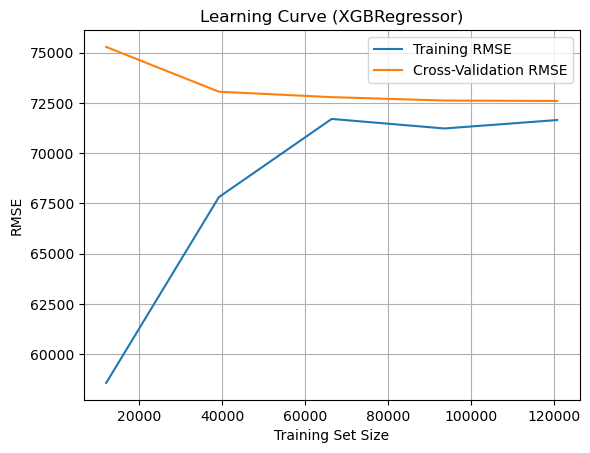

[I 2024-10-11 09:27:22,935] A new study created in memory with name: no-name-e9dfc2f8-24a0-4f5c-a4af-5b6a656dcb3f
[I 2024-10-11 09:27:41,759] Trial 0 finished with value: 75241.89708081304 and parameters: {'n_estimators': 276, 'num_leaves': 105, 'learning_rate': 0.108795277665352, 'feature_fraction': 0.8475368340833694, 'bagging_fraction': 0.5057251875382909}. Best is trial 0 with value: 75241.89708081304.
[I 2024-10-11 09:28:38,154] Trial 1 finished with value: 73754.1473536579 and parameters: {'n_estimators': 545, 'num_leaves': 199, 'learning_rate': 0.016416576815901848, 'feature_fraction': 0.5957529494914504, 'bagging_fraction': 0.6513474845362519}. Best is trial 1 with value: 73754.1473536579.
[I 2024-10-11 09:30:17,005] Trial 2 finished with value: 76095.01603633497 and parameters: {'n_estimators': 852, 'num_leaves': 184, 'learning_rate': 0.0420043222784232, 'feature_fraction': 0.6884689731746834, 'bagging_fraction': 0.8083654635470325}. Best is trial 1 with value: 73754.147353657

[I 2024-10-11 09:52:02,476] Trial 28 finished with value: 72818.061042254 and parameters: {'n_estimators': 461, 'num_leaves': 21, 'learning_rate': 0.0041490633752506246, 'feature_fraction': 0.5976910801942616, 'bagging_fraction': 0.7934354939750449}. Best is trial 27 with value: 72602.52889556356.
[I 2024-10-11 09:52:40,444] Trial 29 finished with value: 74110.13719970091 and parameters: {'n_estimators': 536, 'num_leaves': 85, 'learning_rate': 0.0014299666889264733, 'feature_fraction': 0.5284448734476035, 'bagging_fraction': 0.8862160747216388}. Best is trial 27 with value: 72602.52889556356.
[I 2024-10-11 09:52:56,187] Trial 30 finished with value: 72939.92318593025 and parameters: {'n_estimators': 370, 'num_leaves': 20, 'learning_rate': 0.00458624296144227, 'feature_fraction': 0.7250590879919103, 'bagging_fraction': 0.562694062323154}. Best is trial 27 with value: 72602.52889556356.
[I 2024-10-11 09:53:30,765] Trial 31 finished with value: 72722.10899754791 and parameters: {'n_estima

Best parameters for LightGBM: {'n_estimators': 631, 'num_leaves': 20, 'learning_rate': 0.004738092692966222, 'feature_fraction': 0.5388075253175513, 'bagging_fraction': 0.7933576294298155}


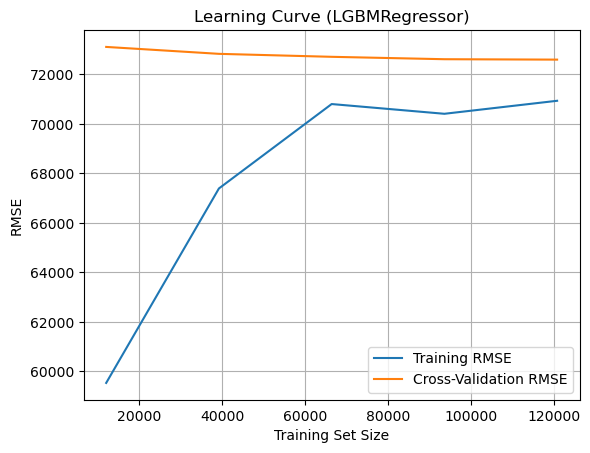

[I 2024-10-11 10:03:21,194] A new study created in memory with name: no-name-055d6b88-cb46-4a2e-b075-9eb7c4647a0a
[I 2024-10-11 10:36:53,087] Trial 0 finished with value: 72941.0670394298 and parameters: {'n_estimators': 575, 'max_depth': 16, 'min_samples_split': 11, 'min_samples_leaf': 7}. Best is trial 0 with value: 72941.0670394298.
[I 2024-10-11 10:50:26,494] Trial 1 finished with value: 72886.12069803977 and parameters: {'n_estimators': 237, 'max_depth': 13, 'min_samples_split': 11, 'min_samples_leaf': 7}. Best is trial 1 with value: 72886.12069803977.
[I 2024-10-11 10:58:00,942] Trial 2 finished with value: 72736.54793055418 and parameters: {'n_estimators': 310, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 2 with value: 72736.54793055418.
[I 2024-10-11 11:50:16,044] Trial 3 finished with value: 72776.49116082268 and parameters: {'n_estimators': 985, 'max_depth': 13, 'min_samples_split': 17, 'min_samples_leaf': 9}. Best is trial 2 with value: 72736

KeyboardInterrupt: 

In [47]:
# Xgboost, Lightgbm and random forest Hyperparameter tuning
xgboost_best_params = tune_model_with_learning_curve('XGBoost', X, y)
lightgbm_best_params = tune_model_with_learning_curve('LightGBM', X, y)
randomforest_best_params = tune_model_with_learning_curve('RandomForest', X, y)

No hyperparameters to tune for Linear Regression.


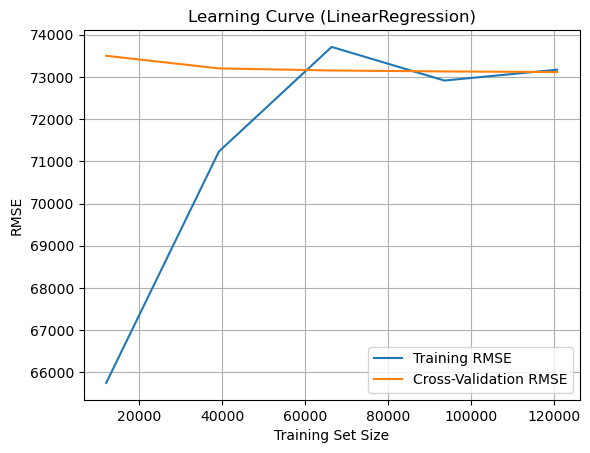

In [77]:
# Linear regression Hyperparameter tuning
linear_regression_result = tune_model_with_learning_curve('LinearRegression', X, y)

In [66]:
# Hypertuning results
Catboost_best_params = {'iterations': 586, 'depth': 5, 'learning_rate': 0.02282156461884929, 'l2_leaf_reg': 8.919099566374644, 'random_strength': 8.016992495855556, 'bagging_temperature': 0.3880252158141104, 'border_count': 72}
Xgboost_best_params = {'n_estimators': 255, 'max_depth': 3, 'learning_rate': 0.024155816081304116, 'subsample': 0.9687355865637971, 'colsample_bytree': 0.8007625007541712, 'reg_alpha': 0.02391381871917265, 'reg_lambda': 0.0011693687070710407}
Lightgbm_best_params = {'n_estimators': 631, 'num_leaves': 20, 'learning_rate': 0.004738092692966222, 'feature_fraction': 0.5388075253175513, 'bagging_fraction': 0.7933576294298155}
RandomForest_best_params = {'n_estimators': 310, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 9}

<section id="sec4.2"> </section>
<h2>Ensemble model - Stacking regressor</h2> 
I have created an stacking regressor that is an ensemble model of the models that have seem to have work in my preprocessing. I am also taking into account the type of the model and try to make my ensemble model as diverse as possible.
 
<a href="#sec4" style="text-decoration: none; color: #333;">Back to modeling and tuning list</a>

In [260]:
def oof_stacking_ensemble_with_eval(models, X, y, test, meta_model, n_splits=5):
    """
    Performs OOF evaluation for base models and StackingRegressor, returning their predictions and evaluation scores.
    """
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Placeholders for OOF predictions and test set predictions
    oof_preds = np.zeros((X.shape[0], len(models)))
    test_preds = np.zeros((test.shape[0], len(models)))
    
    # Evaluate each model with OOF
    model_rmse_scores = []
    
    for idx, model in enumerate(models):
        start_time = time.time()
        oof_test_preds = np.zeros((test.shape[0], n_splits))
        oof_model_preds = np.zeros(X.shape[0])

        for fold, (train_idx, valid_idx) in enumerate(kfold.split(X, y)):
            X_fold_train, X_fold_valid = X.iloc[train_idx], X.iloc[valid_idx]
            y_fold_train, y_fold_valid = y.iloc[train_idx], y.iloc[valid_idx]
            
            # Fit on train fold
            model.fit(X_fold_train, y_fold_train)
            
            # Predict on validation fold
            oof_model_preds[valid_idx] = model.predict(X_fold_valid)
            oof_test_preds[:, fold] = model.predict(test)
        
        # Store OOF predictions and average test predictions
        oof_preds[:, idx] = oof_model_preds
        test_preds[:, idx] = oof_test_preds.mean(axis=1)
        
        # Calculate RMSE for the model
        model_rmse = np.sqrt(mean_squared_error(y, oof_model_preds))
        model_rmse_scores.append(model_rmse)
        
        end_time = time.time()
        model_time = end_time - start_time
        print(f"Model {model} OOF RMSE: {model_rmse:.4f} | Time Taken: {model_time:.2f} seconds")
    
    # Fit the stacking model using OOF predictions
    stacking_model = StackingRegressor(estimators=[(f'model_{i}', m) for i, m in enumerate(models)], 
                                       final_estimator=meta_model)
    
    # OOF predictions for stacking model
    stacking_oof_preds = np.zeros(X.shape[0])
    stacking_test_preds = np.zeros(test.shape[0])
    
    start_time = time.time()
    for fold, (train_idx, valid_idx) in enumerate(kfold.split(X, y)):  
        stacking_model.fit(oof_preds[train_idx], y.iloc[train_idx])
        stacking_oof_preds[valid_idx] = stacking_model.predict(oof_preds[valid_idx])
        stacking_test_preds += stacking_model.predict(test_preds) / n_splits
    
    # Calculate RMSE for stacking model
    stacking_rmse = np.sqrt(mean_squared_error(y, stacking_oof_preds))
    
    end_time = time.time()
    model_time = end_time - start_time
    print(f"Stacking Model OOF RMSE: {stacking_rmse:.4f} | Time Taken: {model_time:.2f} seconds")
    
    # Fit final stacking model on all data
    stacking_model.fit(oof_preds, y)
    
    # Return predictions for base models and stacking model
    return stacking_model, stacking_test_preds, stacking_rmse

Stacking Regressor without hyperparameter tuning

In [96]:
catboost = CatBoostRegressor(verbose=False)
xgboost = XGBRegressor()
lightgbm = LGBMRegressor(verbose=-1)
gbr = GradientBoostingRegressor()
rf = RandomForestRegressor()

models = [catboost,xgboost,lightgbm,gbr,rf]
stacking_model, stacking_test_preds, stacking_rmse  = oof_stacking_ensemble_with_eval(models, X, y, test, LGBMRegressor())

Model <catboost.core.CatBoostRegressor object at 0x000002C24316BE10> OOF RMSE: 74659.9832 | Time Taken: 214.71 seconds
Model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) OOF RMSE: 75744.3946 | Time Taken: 25.00 seconds
Model LGBMRegressor(verbose=-1) OOF RMSE: 72938.2454 | Time Taken: 10.99 second

Stacking Regressor after hyperparameter tuning

In [296]:
print("tuned stacking regressor, with lightGBM as the final estimator")
tuned_catboost = CatBoostRegressor(**Catboost_best_params,verbose = False)
tuned_xgboost = XGBRegressor(**Xgboost_best_params)
tuned_lightgbm = LGBMRegressor(**Lightgbm_best_params, verbose =-1)
tuned_rf = RandomForestRegressor(**RandomForest_best_params)
tuned_gbr = GradientBoostingRegressor()
lr = LinearRegression()

models = [tuned_catboost,tuned_lightgbm,tuned_xgboost,tuned_rf,tuned_gbr]
stacking_regressor, stacking_test_preds, stacking_rmse  = oof_stacking_ensemble_with_eval(models, X, y, test, lr)

tuned stacking regressor, with lightGBM as the final estimator
Model <catboost.core.CatBoostRegressor object at 0x000002C2D8D1FB10> OOF RMSE: 72454.1848 | Time Taken: 124.97 seconds
Model LGBMRegressor(bagging_fraction=0.7933576294298155,
              feature_fraction=0.5388075253175513,
              learning_rate=0.004738092692966222, n_estimators=631,
              num_leaves=20, verbose=-1) OOF RMSE: 72555.9947 | Time Taken: 59.76 seconds
Model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8007625007541712, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.024155816081304116, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_ste

<section id="sec4.3"> </section>
<h2>Ensemble model - Voting regressor</h2> 
I have created an voting regressor that is an ensemble model of the models that have seem to have work in my preprocessing.
I have tried to optimize the model by using two methods. First is genetic algorithms weights and the Second is Optuna

<a href="#sec4" style="text-decoration: none; color: #333;">Back to modeling and tuning list</a>

<h4> Genetic Weights </h4>

In [143]:
def genetic_algorithm_weights(models, oof_preds_components, y, population_size=50, generations=50, mutation_rate=0.1):
    """
    Genetic Algorithm to find optimal weights for the ensemble.
    """
    def create_individual():
        return [random.random() for _ in models]

    def fitness(weights):
        weighted_preds = np.zeros(y.shape[0])
        for (name, _), weight in zip(models, weights):
            weighted_preds += weight * oof_preds_components[name]
        weighted_preds /= sum(weights)
        return -np.sqrt(mean_squared_error(y, weighted_preds))  # Negative because we want to maximize

    def crossover(parent1, parent2):
        point = random.randint(1, len(parent1) - 1)
        return parent1[:point] + parent2[point:]

    def mutate(individual):
        for i in range(len(individual)):
            if random.random() < mutation_rate:
                individual[i] = random.random()
        return individual

    population = [create_individual() for _ in range(population_size)]

    for _ in range(generations):
        population = sorted(population, key=fitness, reverse=True)
        new_population = population[:2]  # Keep the best 2

        while len(new_population) < population_size:
            parent1, parent2 = random.sample(population[:10], 2)  # Select from top 10
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population

    best_weights = max(population, key=fitness)
    return best_weights

def oof_ensemble_evaluation_with_ga_weights(models, X, y, n_splits=5):
    """
    Performs OOF evaluation for an ensemble model with weight optimization using Genetic Algorithm.

    Args:
    models: List of (name, model) tuples.
    X: Features.
    y: Target values.
    n_splits: Number of splits for K-Fold cross-validation.

    Returns:
    Dictionary containing evaluation metrics, OOF predictions, and best weights.
    """
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Placeholders for OOF predictions
    oof_preds_components = {name: np.zeros(X.shape[0]) for name, _ in models}

    start_time = time.time()

    # Perform OOF predictions for individual models
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        for name, model in models:
            model.fit(X_train, y_train)
            oof_preds_components[name][val_idx] = model.predict(X_val)

    # Calculate RMSE for individual components
    individual_rmses = {name: np.sqrt(mean_squared_error(y, preds)) 
                        for name, preds in oof_preds_components.items()}

    # Use Genetic Algorithm to find best weights
    best_weights = genetic_algorithm_weights(models, oof_preds_components, y)

    # Calculate best ensemble predictions
    best_oof_preds = np.zeros(X.shape[0])
    for (name, _), weight in zip(models, best_weights):
        best_oof_preds += weight * oof_preds_components[name]
    best_oof_preds /= sum(best_weights)

    best_rmse = np.sqrt(mean_squared_error(y, best_oof_preds))

    end_time = time.time()
    elapsed_time = end_time - start_time

    # Create and fit the best ensemble
    best_ensemble = VotingRegressor(
        estimators=models,
        weights=best_weights
    )
    best_ensemble.fit(X, y)

    # Print evaluation details
    print(f"Evaluation time: {elapsed_time:.2f} seconds")
    print(f"Best Ensemble RMSE: {best_rmse:.4f}")
    print("Best Weights:")
    for (name, _), weight in zip(models, best_weights):
        print(f"  {name}: {weight:.4f}")
    print("\nIndividual Model RMSEs:")
    for name, rmse in individual_rmses.items():
        print(f"  {name} RMSE: {rmse:.4f}")

    return {
        "best_ensemble": best_ensemble,
        "best_rmse": best_rmse,
        "best_weights": best_weights,
        "individual_rmses": individual_rmses,
        "oof_preds_components": oof_preds_components,
        "best_oof_preds": best_oof_preds,
        "evaluation_time": elapsed_time
    }

In [154]:
##### Evaluate the ensemble model and each of the models building it 
models = [
    ('catboost', tuned_catboost),
    ('randomforest', tuned_rf),
    ('xgboost', tuned_xgboost),
    ('lightgbm', tuned_lightgbm),
    ('gradientboosting', tuned_gbr),
    ('linearregression', lr)
]

results = oof_ensemble_evaluation_with_ga_weights(models, X, y)

Evaluation time: 2481.09 seconds
Best Ensemble RMSE: 72445.0209
Best Weights:
  catboost: 0.9990
  randomforest: 0.0773
  xgboost: 0.0094
  lightgbm: 0.2133
  gradientboosting: 0.0039
  linearregression: 0.0066

Individual Model RMSEs:
  catboost RMSE: 72454.1848
  randomforest RMSE: 72760.1081
  xgboost RMSE: 72557.7090
  lightgbm RMSE: 72555.9947
  gradientboosting RMSE: 73112.8470
  linearregression RMSE: 73074.2541


<h3> optuna - optimize voting regressor </h3>

In [175]:
def optimize_voting_regressor(models, X, y, n_trials=100):
    start_time = time.time()
    
    # Pre-compute OOF predictions
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    oof_preds = {name: np.zeros(X.shape[0]) for name, _ in models}
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        for name, model in models:
            model.fit(X_train, y_train)
            oof_preds[name][val_idx] = model.predict(X_val)
    
    def objective(trial):
        weights = [trial.suggest_float(f'weight_{i}', 0, 1) for i in range(len(models))]
        weighted_preds = np.zeros(X.shape[0])
        for (name, _), weight in zip(models, weights):
            weighted_preds += weight * oof_preds[name]
        weighted_preds /= sum(weights)
        return np.sqrt(mean_squared_error(y, weighted_preds))

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials)

    best_weights = [study.best_params[f'weight_{i}'] for i in range(len(models))]
    best_voting_regressor = VotingRegressor(
        estimators=models,
        weights=best_weights
    )
    best_voting_regressor.fit(X, y)
    
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Evaluation time: {execution_time:.2f} seconds")
    
    return best_voting_regressor, best_weights, study.best_value

# Usage
models = [
    ('catboost', tuned_catboost),
    ('randomforest', tuned_rf),
    ('xgboost', tuned_xgboost),
    ('lightgbm', tuned_lightgbm),
    ('gradientboosting', tuned_gbr),
    ('linearregression', lr)
]
best_regressor, best_weights, best_rmse = optimize_voting_regressor(models, X, y)

[I 2024-10-17 16:52:56,092] A new study created in memory with name: no-name-e95aa206-99a6-40ad-a1cb-a078effe4942
[I 2024-10-17 16:52:56,120] Trial 0 finished with value: 72509.27031416413 and parameters: {'weight_0': 0.7760811766093264, 'weight_1': 0.01487800443941456, 'weight_2': 0.9957866581288077, 'weight_3': 0.9682315284579074, 'weight_4': 0.6449083333159374, 'weight_5': 0.5620649440227133}. Best is trial 0 with value: 72509.27031416413.
[I 2024-10-17 16:52:56,133] Trial 1 finished with value: 72494.34044189907 and parameters: {'weight_0': 0.8025074630704907, 'weight_1': 0.415059688492868, 'weight_2': 0.9303447814511332, 'weight_3': 0.7695086662983376, 'weight_4': 0.48895655496588697, 'weight_5': 0.04586374716524222}. Best is trial 1 with value: 72494.34044189907.
[I 2024-10-17 16:52:56,146] Trial 2 finished with value: 72554.19336499507 and parameters: {'weight_0': 0.027115599005194002, 'weight_1': 0.8671962625038208, 'weight_2': 0.368755430597522, 'weight_3': 0.3453287159248867,

[I 2024-10-17 16:52:57,019] Trial 25 finished with value: 72486.43359284019 and parameters: {'weight_0': 0.9981484287816692, 'weight_1': 0.6940164984644321, 'weight_2': 0.6165352144182823, 'weight_3': 0.5099545851748882, 'weight_4': 0.43772341495903166, 'weight_5': 0.10185296103875385}. Best is trial 12 with value: 72475.95712060455.
[I 2024-10-17 16:52:57,068] Trial 26 finished with value: 72475.6414906285 and parameters: {'weight_0': 0.7063385352911391, 'weight_1': 0.5094418088970019, 'weight_2': 0.25893379774202263, 'weight_3': 0.1694839697431882, 'weight_4': 0.10515962790393396, 'weight_5': 0.256590370836255}. Best is trial 26 with value: 72475.6414906285.
[I 2024-10-17 16:52:57,118] Trial 27 finished with value: 72516.83133446028 and parameters: {'weight_0': 0.6855194298240797, 'weight_1': 0.4574726941002539, 'weight_2': 0.2759313226379436, 'weight_3': 0.1394269986400563, 'weight_4': 0.5591122409800939, 'weight_5': 0.3032092178679185}. Best is trial 26 with value: 72475.6414906285

[I 2024-10-17 16:52:58,237] Trial 50 finished with value: 72503.4087597604 and parameters: {'weight_0': 0.22955243012499338, 'weight_1': 0.33891636138729114, 'weight_2': 0.3447613622487363, 'weight_3': 0.32161083535798035, 'weight_4': 0.20470444726251885, 'weight_5': 0.08458309436324161}. Best is trial 45 with value: 72460.66172652753.
[I 2024-10-17 16:52:58,286] Trial 51 finished with value: 72468.81026688773 and parameters: {'weight_0': 0.7509644862580043, 'weight_1': 0.4773161083354658, 'weight_2': 0.5160359962102122, 'weight_3': 0.05471730888491788, 'weight_4': 0.06158314003385727, 'weight_5': 0.13841594969839652}. Best is trial 45 with value: 72460.66172652753.
[I 2024-10-17 16:52:58,331] Trial 52 finished with value: 72466.77715257273 and parameters: {'weight_0': 0.7482068712845245, 'weight_1': 0.021024785641892862, 'weight_2': 0.5037512390154868, 'weight_3': 0.21076509310783265, 'weight_4': 0.048470015652520626, 'weight_5': 0.15093480777699905}. Best is trial 45 with value: 7246

[I 2024-10-17 16:52:59,415] Trial 75 finished with value: 72461.33299046298 and parameters: {'weight_0': 0.9345849196571322, 'weight_1': 0.2869349814023116, 'weight_2': 0.3306739714420719, 'weight_3': 0.3649711587189355, 'weight_4': 0.07356258400964774, 'weight_5': 0.21888248748507932}. Best is trial 64 with value: 72455.28323095666.
[I 2024-10-17 16:52:59,462] Trial 76 finished with value: 72461.08104583932 and parameters: {'weight_0': 0.9242167620547241, 'weight_1': 0.31561222826881086, 'weight_2': 0.37690594612988587, 'weight_3': 0.4148577611576739, 'weight_4': 0.07671128687357895, 'weight_5': 0.1823091510316089}. Best is trial 64 with value: 72455.28323095666.
[I 2024-10-17 16:52:59,510] Trial 77 finished with value: 72465.08586988521 and parameters: {'weight_0': 0.8625898012706026, 'weight_1': 0.3720363438269157, 'weight_2': 0.38109171696765926, 'weight_3': 0.40618536520743953, 'weight_4': 0.11126361604222104, 'weight_5': 0.1815355333070684}. Best is trial 64 with value: 72455.283

Evaluation time: 2915.07 seconds


In [159]:
def optimize_voting_regressor(models, X, y, n_trials=100):
    start_time = time.time()
    def objective(trial):
        weights = [trial.suggest_float(f'weight_{i}', 0, 1) for i in range(len(models))]
        voting_regressor = VotingRegressor(
            estimators=[(f'model_{i}', model) for i, model in enumerate(models)],
            weights=weights
        )
        rmse_scorer = make_scorer(custom_rmse, greater_is_better=False, is_log_transformed=False)
        score = cross_val_score(voting_regressor, X, y, cv=5, scoring=rmse_scorer)
        return score.mean()

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials)

    best_weights = [study.best_params[f'weight_{i}'] for i in range(len(models))]
    best_voting_regressor = VotingRegressor(
        estimators=[(f'model_{i}', model) for i, model in enumerate(models)],
        weights=best_weights
    )
    best_voting_regressor.fit(X, y)
    
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Evaluation time: {execution_time:.2f} seconds")
    
    return best_voting_regressor, best_weights, study.best_value

In [165]:
# Create the optimized model
models = [tuned_catboost,tuned_xgboost,tuned_lightgbm,tuned_rf,tuned_gbr,lr]
best_regressor, best_weights, best_rmse = optimize_voting_regressor(models, X, y)

[I 2024-10-14 11:47:24,994] A new study created in memory with name: no-name-a6ca4e85-05e5-4e19-b5c1-227725d21c1f
[I 2024-10-14 12:31:55,373] Trial 0 finished with value: 72434.0734030426 and parameters: {'weight_0': 0.9186871793402898, 'weight_1': 0.4875983773140806, 'weight_2': 0.45954141710288343, 'weight_3': 0.7572762878064924, 'weight_4': 0.09272286272761099, 'weight_5': 0.17194522337577456}. Best is trial 0 with value: 72434.0734030426.
[I 2024-10-14 13:17:26,078] Trial 1 finished with value: 72496.98709156163 and parameters: {'weight_0': 0.6524410615447126, 'weight_1': 0.6143060594450002, 'weight_2': 0.5124392865937655, 'weight_3': 0.19615094664335386, 'weight_4': 0.8698106352684808, 'weight_5': 0.26711632588449474}. Best is trial 0 with value: 72434.0734030426.
[I 2024-10-14 13:52:51,611] Trial 2 finished with value: 72448.34764804706 and parameters: {'weight_0': 0.7249333866993117, 'weight_1': 0.8250692020124828, 'weight_2': 0.3845617819717764, 'weight_3': 0.9971934467723396, 

[I 2024-10-15 05:54:46,000] Trial 25 finished with value: 72440.7062310781 and parameters: {'weight_0': 0.7143255678712409, 'weight_1': 0.24434856011410022, 'weight_2': 0.7637623629611648, 'weight_3': 0.5200455572558504, 'weight_4': 0.14853962927380612, 'weight_5': 0.6038123772355259}. Best is trial 0 with value: 72434.0734030426.
[I 2024-10-15 06:28:19,686] Trial 26 finished with value: 72442.8333747662 and parameters: {'weight_0': 0.9092282102627834, 'weight_1': 0.5609515496634193, 'weight_2': 0.8970193838903702, 'weight_3': 0.6616882295280451, 'weight_4': 0.3616297280984232, 'weight_5': 0.7150134089589647}. Best is trial 0 with value: 72434.0734030426.
[I 2024-10-15 06:59:13,935] Trial 27 finished with value: 72461.76796897531 and parameters: {'weight_0': 0.7666040450822807, 'weight_1': 0.44630613509706607, 'weight_2': 0.3869163130210124, 'weight_3': 0.42709684847502605, 'weight_4': 0.20193806084035487, 'weight_5': 0.8253556967750765}. Best is trial 0 with value: 72434.0734030426.
[

[I 2024-10-15 22:04:05,546] Trial 50 finished with value: 72428.0953881344 and parameters: {'weight_0': 0.9374537136416352, 'weight_1': 0.308048289759349, 'weight_2': 0.7327089059591743, 'weight_3': 0.09045501040490811, 'weight_4': 0.2502660515026824, 'weight_5': 0.21141521577960715}. Best is trial 47 with value: 72414.10255533969.
[I 2024-10-15 22:48:29,946] Trial 51 finished with value: 72421.20856516305 and parameters: {'weight_0': 0.888214807689991, 'weight_1': 0.08576165126461828, 'weight_2': 0.8015928806656628, 'weight_3': 0.17540871630172356, 'weight_4': 0.18410928121671744, 'weight_5': 0.15043469565920436}. Best is trial 47 with value: 72414.10255533969.
[I 2024-10-15 23:23:49,154] Trial 52 finished with value: 72417.35113976632 and parameters: {'weight_0': 0.951165015245416, 'weight_1': 0.16445859345180475, 'weight_2': 0.8001282171279237, 'weight_3': 0.03621777576410598, 'weight_4': 0.046731199876089424, 'weight_5': 0.24750182937892282}. Best is trial 47 with value: 72414.1025

[I 2024-10-16 12:10:00,610] Trial 75 finished with value: 72418.39781737457 and parameters: {'weight_0': 0.7740547640016743, 'weight_1': 0.345454133931997, 'weight_2': 0.49761905996554334, 'weight_3': 0.29618265240604125, 'weight_4': 0.07156620995668272, 'weight_5': 0.07540627939227962}. Best is trial 71 with value: 72411.8480719515.
[I 2024-10-16 12:49:31,789] Trial 76 finished with value: 72429.94106915357 and parameters: {'weight_0': 0.523454232938958, 'weight_1': 0.21939245980678512, 'weight_2': 0.6399680301775243, 'weight_3': 0.3943604082292874, 'weight_4': 0.10531811351888457, 'weight_5': 0.039747219235365755}. Best is trial 71 with value: 72411.8480719515.
[I 2024-10-16 13:44:08,506] Trial 77 finished with value: 72421.55482662143 and parameters: {'weight_0': 0.9177868811347507, 'weight_1': 0.4184297847514067, 'weight_2': 0.40457627227765697, 'weight_3': 0.3224800623660823, 'weight_4': 0.07859899699692414, 'weight_5': 0.14900771069910573}. Best is trial 71 with value: 72411.8480

KeyboardInterrupt: 

In [277]:
models = [
    ('catboost', tuned_catboost),
    ('xgboost', tuned_xgboost),
    ('lightgbm', tuned_lightgbm),
    ('random_forest', tuned_rf),
    ('gradient_boosting', tuned_gbr),
    ('linear_regression', lr)
]
# Assign the weights in the correct order
best_weights = [0.8666139090735919, 0.13702000103076156, 0.6342252501805786, 
                0.2933663298241559, 0.05648707167230083, 0.13742290250514702]

# Instantiate VotingRegressor with named estimators and weights
weighted_regressor = VotingRegressor(estimators=models, weights=best_weights)

<h4>Insights</h4>
In the evaluation it seems that the ensembler performs better then each model indivdualy 
</br>
In addition all of them have similar cross validation error, except RandomForestRegressor which receives a slightly better result.

<section id="sec4.4"> </section>
<h1> Ensemble investigation </h1>
This section includes the investigation of each individual model that is being used while building the nsemble. And an investigation 
<h2> SHAP values and feature importance
Insights from it
ensemble_weights </h2>
<a href="#sec4" style="text-decoration: none; color: #333;">Back to modeling and tuning list</a>

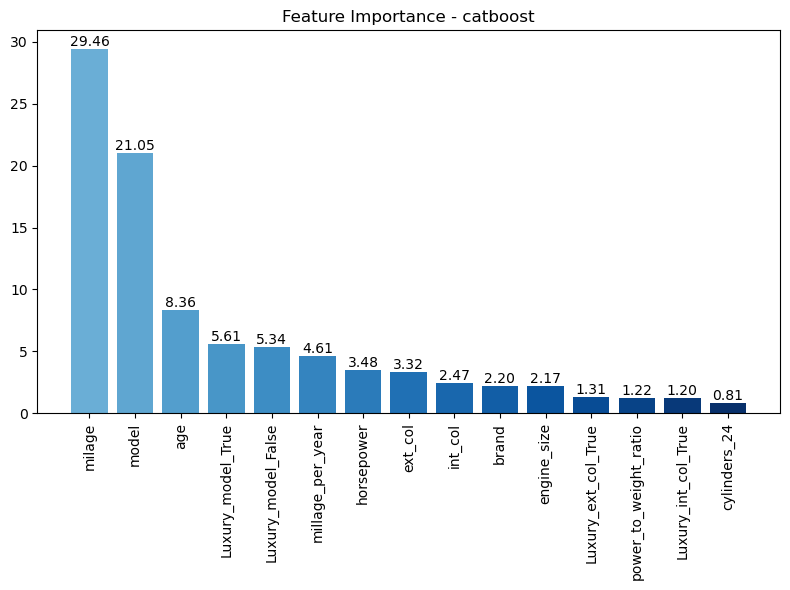

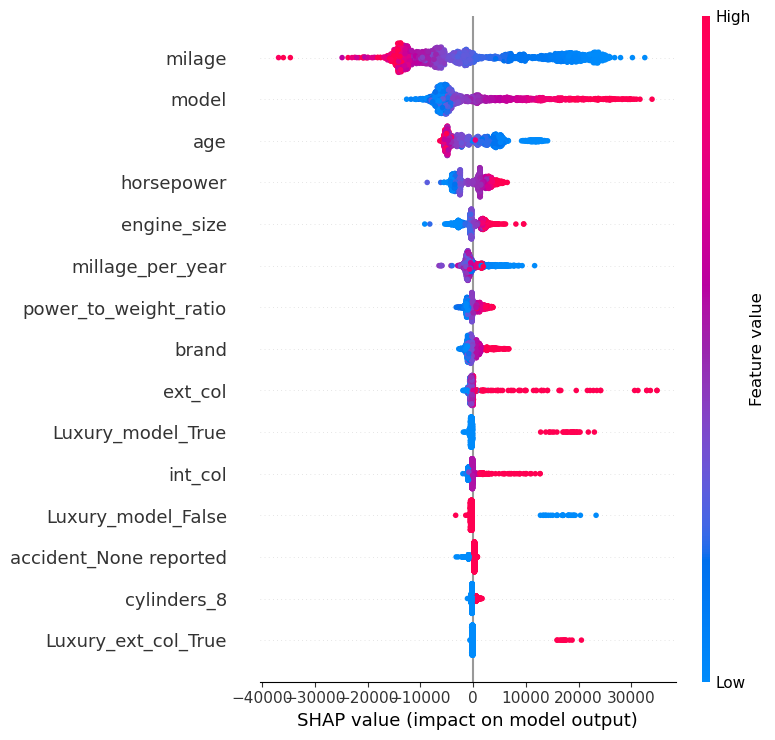

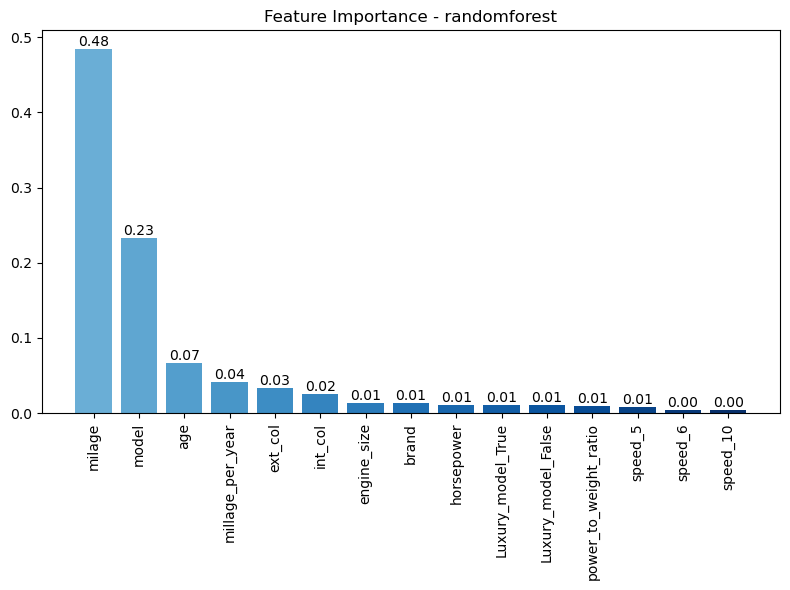

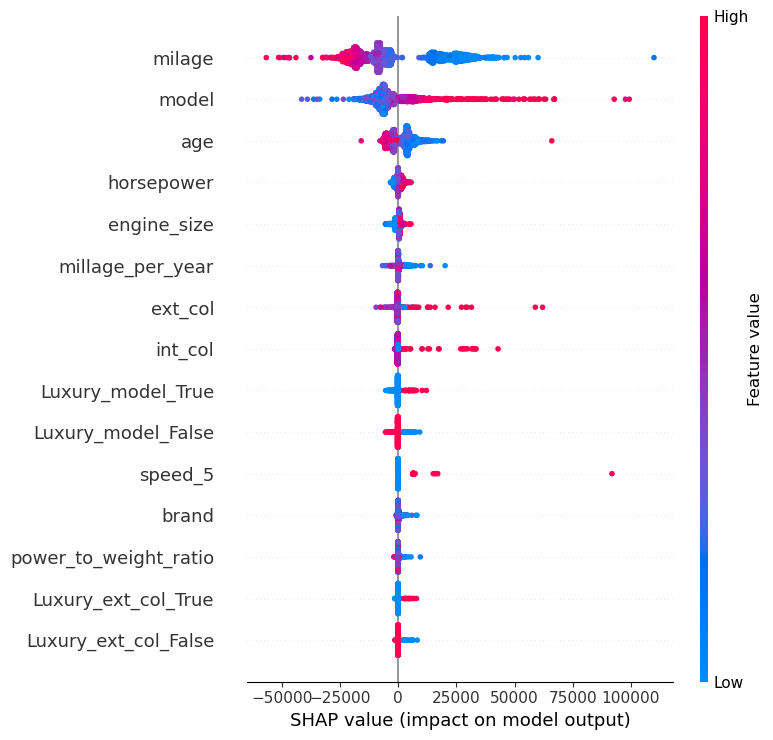

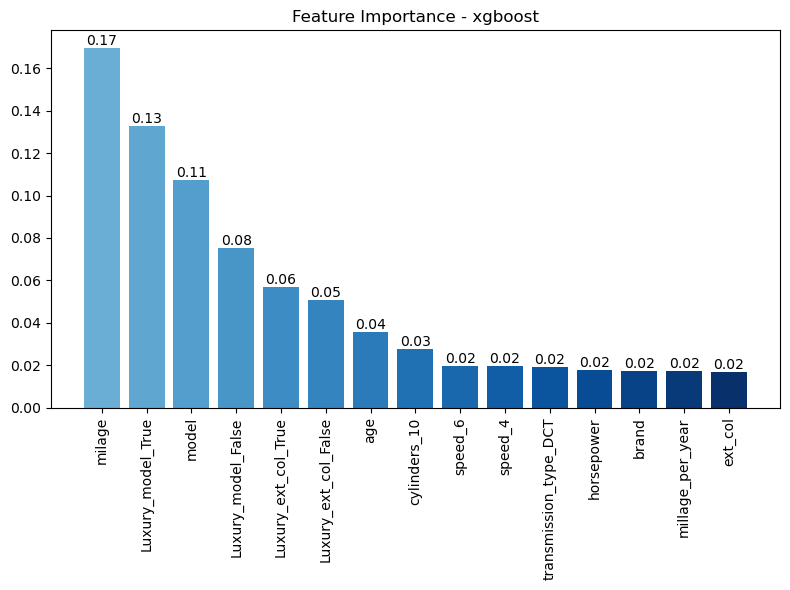

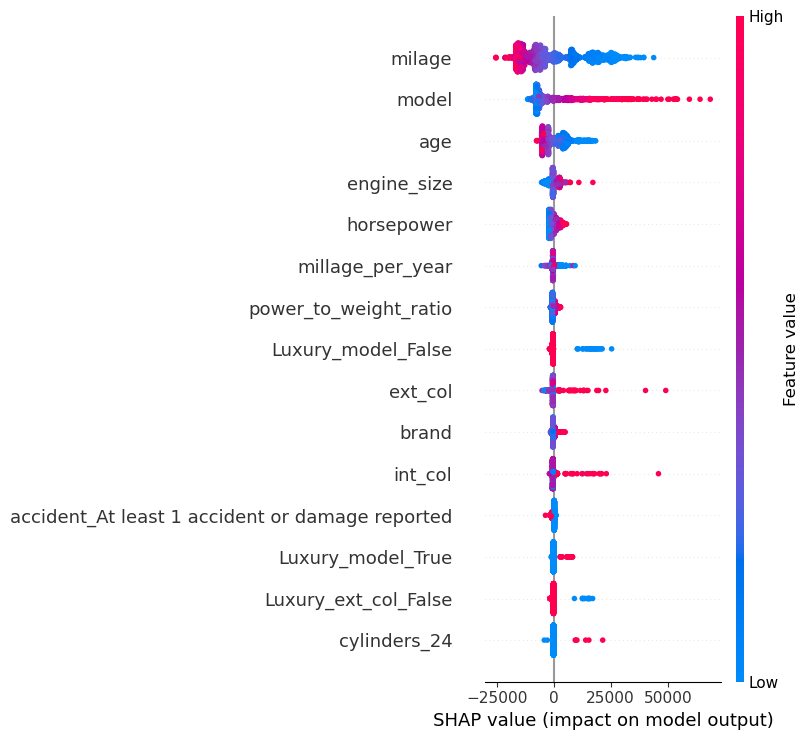

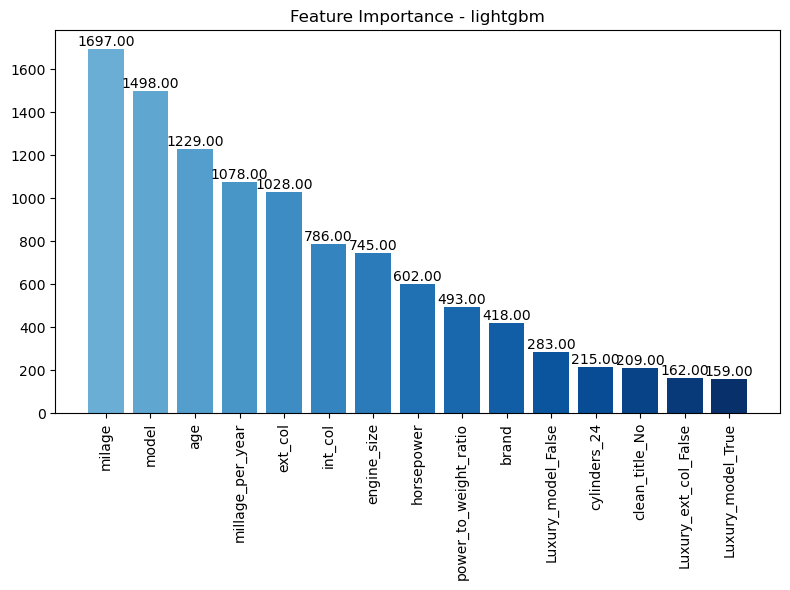

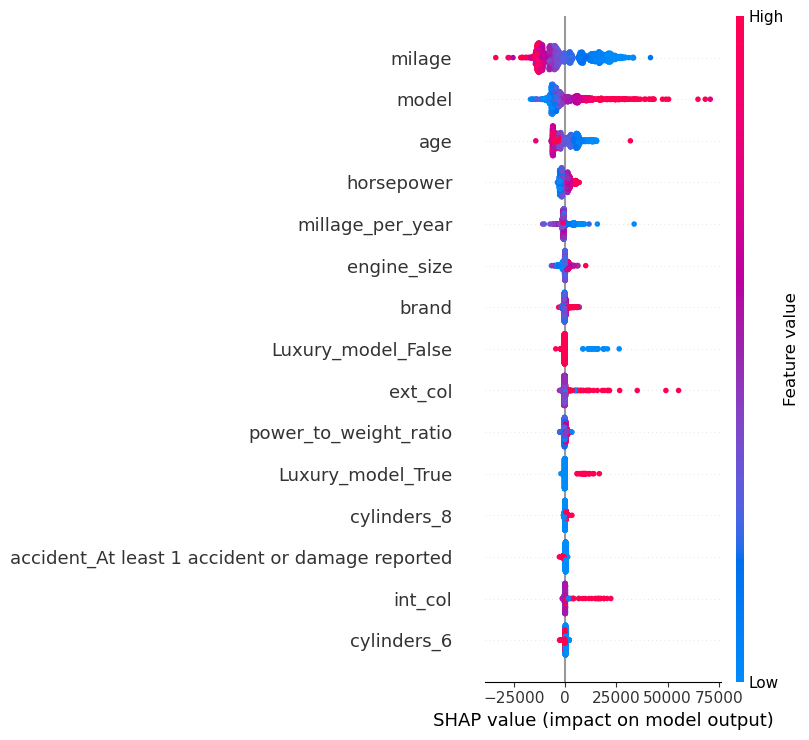

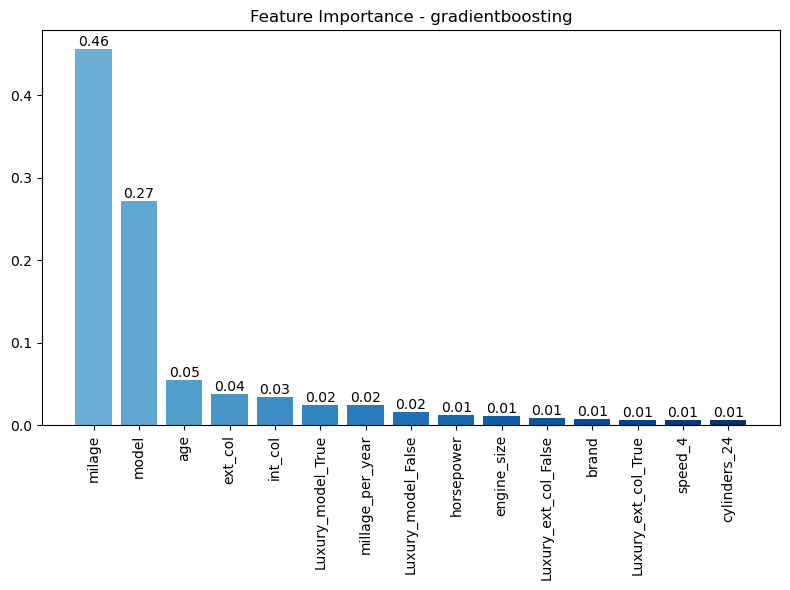

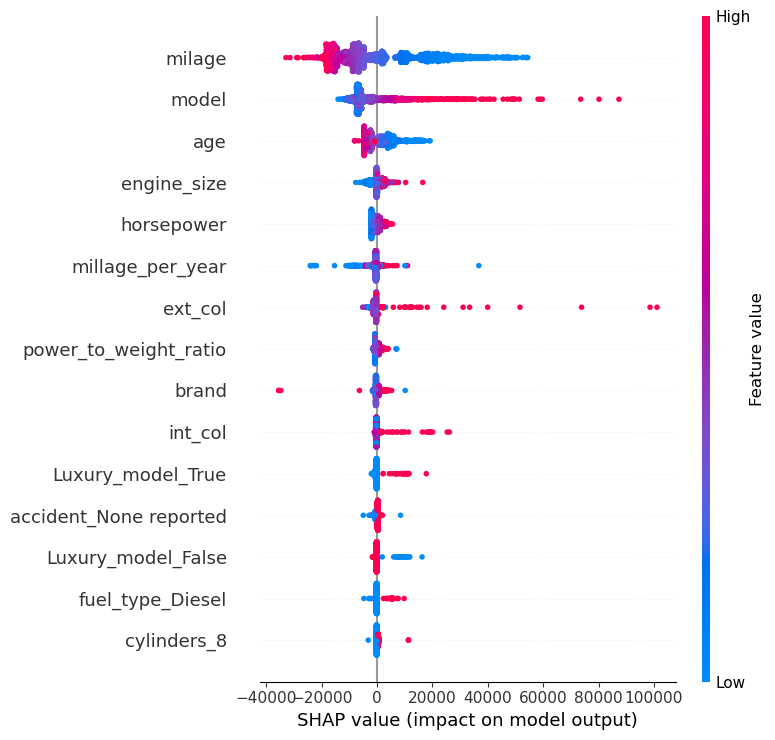

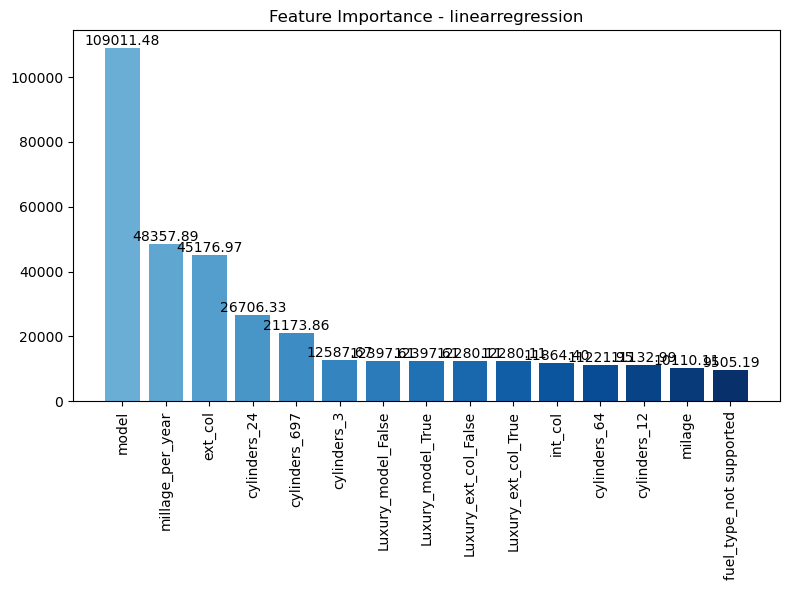

Error computing SHAP values for linearregression: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._base.LinearRegression'>


In [251]:
def analyze_ensemble_model(ensemble_model, X, y, n_top_features=15):
    """
    Analyze an ensemble model by displaying feature importance and SHAP values
    for each individual model, with bars oriented vertically, value labels, and color scaling.

    Parameters:
    ensemble_model : VotingRegressor or similar ensemble model
        The ensemble model to analyze
    X : pandas DataFrame
        The feature dataset
    y : pandas Series or numpy array
        The target variable
    n_top_features : int, optional (default=20)
        Number of top features to display in plots
    """
    
    feature_names = X.columns

    def plot_feature_importance(importances, title, ax):
        # Sort importances in descending order for plotting from highest to lowest
        indices = np.argsort(importances)[::-1][:n_top_features]
        top_importances = importances[indices]
        top_features = [feature_names[i] for i in indices]
        
        colors = cm.Blues(np.linspace(0.5, 1, len(top_importances)))
        
        bars = ax.bar(top_features, top_importances, color=colors)
        ax.set_title(title)
        ax.set_xticks(range(len(top_features)))
        ax.set_xticklabels(top_features, rotation=90)
        
        # Add value labels at the top of each bar
        for bar, imp in zip(bars, top_importances):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{imp:.2f}', 
                    ha='center', va='bottom', color='black', fontweight='bold')

    def get_feature_importance(model):
        if hasattr(model, 'feature_importances_'):
            return model.feature_importances_
        elif isinstance(model, LinearRegression):
            return np.abs(model.coef_)
        else:
            return None

    def get_shap_values(model, X):
        if isinstance(model, (RandomForestRegressor)) or type(model).__name__ in ['LinearRegression','GradientBoostingRegressor','XGBRegressor', 'LGBMRegressor', 'CatBoostRegressor']:
            explainer = shap.TreeExplainer(model)
            return explainer.shap_values(X)    

    # Analysis for each model
    for name, model in ensemble_model.named_estimators_.items():
        fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

        # Feature Importance Plot
        importances = get_feature_importance(model)
        if importances is not None:
            plot_feature_importance(importances, f"Feature Importance - {name}", ax1)
        else:
            ax1.text(0.5, 0.5, "Feature importance not available", ha='center', va='center')

        plt.tight_layout()
        plt.show()

        # SHAP Values Beeswarm Plot
        try:
            shap_values = get_shap_values(model, X)
            plt.figure(figsize=(8, 6))
            shap.summary_plot(shap_values, X, plot_type="dot", max_display=n_top_features, show=False)

        except Exception as e:
            print(f"Error computing SHAP values for {name}: {e}")

# Usage
analyze_ensemble_model(best_regressor, X, y)

<h4>Insights</h4> 
<p>The most impactful features for individual models are:</p>
<p>millage, model, Age, engine_size, horsepower</p>
millage - the most impactful feature across most models, when using shap it can be seen that the effect it has is a negative one, the higher the millage of the car is the lower the price tend to be.
</br>
model - highly impactful feature that because he is encoded as a target encoder the higher the more positivly impactful it is
age - like millage age has a negative effect on the final price. The older the car the less it tends to cost
horsepower - same trajectory as model but more subtle
engine_size - same trajectory as model but more subtle

In [317]:
def analyze_ensemble_models(stack_model, vote_model, X, y, n_repeats=10, n_top_features=15):
    """
    Analyze both a StackingRegressor and a VotingRegressor ensemble model by displaying 
    permutation importance.

    Parameters:
    stack_model : StackingRegressor
        The stacking ensemble model to analyze
    vote_model : VotingRegressor
        The voting ensemble model to analyze
    X : pandas DataFrame
        The feature dataset
    y : pandas Series or numpy array
        The target variable
    n_repeats : int, optional (default=10)
        Number of times to permute a feature for permutation importance
    n_top_features : int, optional (default=15)
        Number of top features to display in plots
    """
    
    def plot_permutation_importance(model, X, y, title):
        perm_importance = permutation_importance(model, X, y, n_repeats=n_repeats, random_state=0)
        sorted_idx = perm_importance.importances_mean.argsort()[-n_top_features:]
        
        # Plotting permutation importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x=perm_importance.importances_mean[sorted_idx], 
                    y=X.columns[sorted_idx], palette="Blues_r")
        plt.title(f"{title} - Permutation Importance")
        plt.xlabel("Permutation Score")
        plt.tight_layout()
        plt.show()
   
    # 1. Voting Regressor - Permutation Importance
    plot_permutation_importance(vote_model, X, y, "Voting Regressor")
    
    # 2. Stacking Regressor - Permutation Importance
    plot_permutation_importance(stack_model, X, y, "Stacking Regressor")


In [313]:
def analyze_ensemble_models(stack_model, vote_model, X, y, n_repeats=10, n_top_features=15):
    """
    Analyze both a StackingRegressor and a VotingRegressor ensemble model by displaying 
    permutation importance and SHAP values with beeswarm plots.

    Parameters:
    stack_model : StackingRegressor
        The stacking ensemble model to analyze
    vote_model : VotingRegressor
        The voting ensemble model to analyze
    X : pandas DataFrame
        The feature dataset
    y : pandas Series or numpy array
        The target variable
    n_repeats : int, optional (default=10)
        Number of times to permute a feature for permutation importance
    n_top_features : int, optional (default=15)
        Number of top features to display in plots
    """
    
    def plot_permutation_importance(model, X, y, title, ax):
        perm_importance = permutation_importance(model, X, y, n_repeats=n_repeats, random_state=0)
        sorted_idx = perm_importance.importances_mean.argsort()[-n_top_features:]
        
        # Plotting permutation importance
        sns.barplot(x=perm_importance.importances_mean[sorted_idx], 
                    y=X.columns[sorted_idx], ax=ax, palette="Blues_r")
        ax.set_title(f"{title} - Permutation Importance")
        ax.set_xlabel("Permutation Score")
    
    def plot_shap_beeswarm(model, X, title, model_type="tree"):
        if model_type == "tree":
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X)
        else:
            sample_data = X.sample(100, random_state=0)  # Use a sample to reduce computation time
            explainer = shap.KernelExplainer(model.predict, sample_data)
            shap_values = explainer.shap_values(sample_data)
        
        # Display SHAP values as beeswarm
        shap.summary_plot(shap_values, X, plot_type="dot", max_display=n_top_features, show=True)
    
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Voting Regressor - Permutation Importance
    plot_permutation_importance(vote_model, X, y, "Voting Regressor", axs[0, 0])
    
    # 2. Voting Regressor - SHAP Values with KernelExplainer
    try:
        plot_shap_beeswarm(vote_model, X, "Voting Regressor", model_type="kernel")
    except Exception as e:
        print(f"Error computing SHAP values for Voting Regressor: {e}")
    
    # 3. Stacking Regressor - Permutation Importance
    plot_permutation_importance(stack_model, X, y, "Stacking Regressor", axs[1, 0])
    
    # 4. Stacking Regressor - SHAP Values for Meta-Model
    try:
        plot_shap_beeswarm(stack_model.final_estimator_, X, "Stacking Regressor Meta-Model", model_type="kernel")
    except Exception as e:
        print(f"Error computing SHAP values for Stacking Regressor: {e}")
    
    plt.tight_layout()
    plt.show()

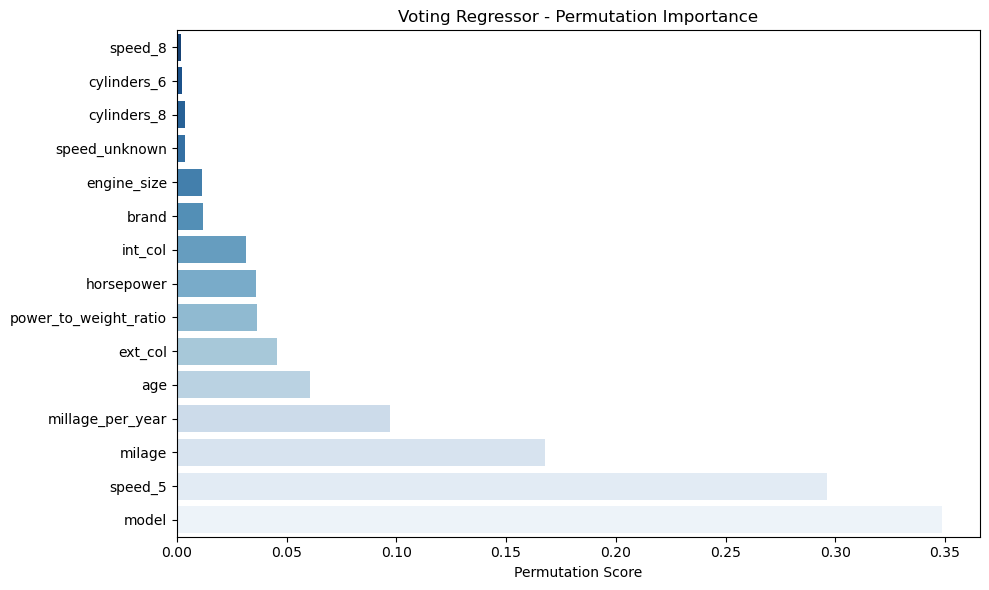

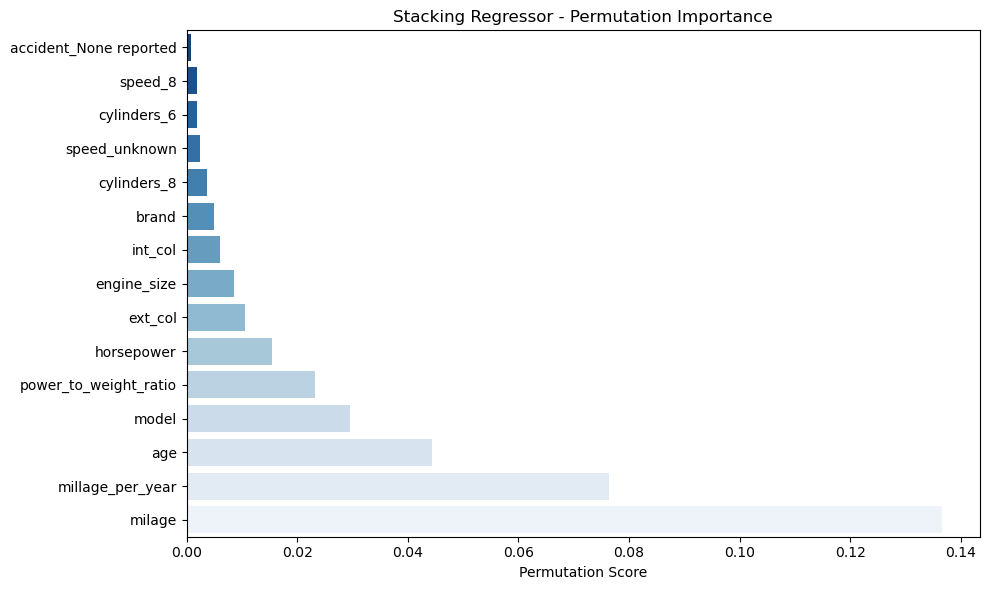

In [318]:
# Usage
weighted_regressor_copy = clone(weighted_regressor)
stacking_regressor_copy = clone(stacking_regressor)
weighted_regressor_copy.fit(X, y)
stacking_regressor_copy.fit(X, y)
analyze_ensemble_models(stacking_regressor_copy, weighted_regressor_copy, X, y)

<h4>Insights</h4>
For the 

<section id="sec5"> </section>
<h1>Predictions</h1>

final prediction 
<a href="#back" style="text-decoration: none; color: #333;">Back to table of contents</a>

In [295]:
weighted_regressor.fit(X, y)
y_pred = weighted_regressor.predict(test)

sample_sub["price"] = y_pred
display(sample_sub["price"].head(10))
sample_sub.to_csv("predictions.csv", index=False)

0    17460.332181
1    85503.181651
2    55161.673173
3    26934.302507
4    30200.124371
5    17254.065453
6    11739.781249
7    41223.564234
8    70759.918307
9    32930.222705
Name: price, dtype: float64

<h3> Potential improvements </h3>
As far as researach and potential changes and improvement goes the following is possible
</br>
reduce the number of features based on different metrics.
such as:
mutual information threshold,
Shap values conclusions,
Feature importance scores,
permutation_importance scores.
</br>
Use and trying to implement bigger and more complexed OOF ensembles.
it may be possible that with larger ensembles that includes varitey of others models the score will be able to improve.